In [26]:
import pandas as pd
import numpy as np

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
import datetime as dt

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso

In [30]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection

# Data Description

# Rossmann Stores Data.csv - historical data including Sales



# store.csv - supplemental information about the stores
Data fields
Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Id - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [31]:
df=pd.read_csv(r'D:\jupyter\retail_sale_prediction_regression\Rossmann Stores Data.csv')

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_41388\3194144063.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'D:\jupyter\retail_sale_prediction_regression\Rossmann Stores Data.csv')


In [32]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [33]:
store_df=pd.read_csv(r'D:\jupyter\retail_sale_prediction_regression\store.csv')

In [34]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [35]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [36]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [37]:
store_df['CompetitionOpenSinceMonth'].unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [38]:
store_df['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [39]:
store_df['CompetitionOpenSinceMonth'].describe()

count    761.000000
mean       7.224704
std        3.212348
min        1.000000
25%        4.000000
50%        8.000000
75%       10.000000
max       12.000000
Name: CompetitionOpenSinceMonth, dtype: float64

In [40]:
store_df['CompetitionOpenSinceYear'].describe()

count     761.000000
mean     2008.668857
std         6.195983
min      1900.000000
25%      2006.000000
50%      2010.000000
75%      2013.000000
max      2015.000000
Name: CompetitionOpenSinceYear, dtype: float64

In [41]:
store_df['CompetitionDistance'].describe()

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64

In [42]:
store_df['CompetitionOpenSinceMonth'].fillna(store_df['CompetitionOpenSinceMonth'].mode()[0],inplace=True)
store_df['CompetitionOpenSinceYear'].fillna(store_df['CompetitionOpenSinceYear'].mode()[0],inplace=True)
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(),inplace=True)

In [43]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,9.0,2013.0,0,NaN,NaN,NaN
1113,1114,a,c,870.0,9.0,2013.0,0,NaN,NaN,NaN


In [44]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [45]:
store_df['Promo2SinceWeek'].unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [46]:
store_df['Promo2SinceWeek'].describe()

count    571.000000
mean      23.595447
std       14.141984
min        1.000000
25%       13.000000
50%       22.000000
75%       37.000000
max       50.000000
Name: Promo2SinceWeek, dtype: float64

In [47]:
store_df['Promo2SinceWeek'].isnull().sum()

544

In [48]:
store_df['Promo2SinceYear'].isnull().sum()

544

In [49]:
store_df['Promo2SinceYear'].unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [50]:
store_df['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [51]:
store_df['PromoInterval'].isnull().sum()

544

In [52]:
store_df['Promo2SinceWeek'].fillna(0,inplace=True)
store_df['Promo2SinceYear'].fillna(0,inplace=True)
store_df['PromoInterval'].fillna(0,inplace=True)

In [53]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,9.0,2013.0,0,0.0,0.0,0
1113,1114,a,c,870.0,9.0,2013.0,0,0.0,0.0,0


In [54]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [56]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [57]:
df["Date"]=pd.to_datetime(df["Date"])
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day
df["Week"]=df["Date"].dt.week%4
df["WeekOfYear"]=df["Date"].dt.week

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_41388\3548194347.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["Week"]=df["Date"].dt.week%4
C:\Users\Abhishek\AppData\Local\Temp\ipykernel_41388\3548194347.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["WeekOfYear"]=df["Date"].dt.week


In [58]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,3,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,3,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,3,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,3,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,3,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,1


In [59]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,9.0,2013.0,0,0.0,0.0,0
1113,1114,a,c,870.0,9.0,2013.0,0,0.0,0.0,0


In [60]:
df=df.merge(store_df,how='outer',on=['Store'])

In [61]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'Week',
       'WeekOfYear', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [62]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,2013,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,2013,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,2013,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,2013,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [63]:
df["Store"].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115], dtype=int64)

In [64]:
df["DayOfWeek"].unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

In [65]:
df["Date"].isnull().sum()

0

In [66]:
df["Sales"].unique()

array([ 5263,  5020,  4782, ..., 20362, 18841, 21237], dtype=int64)

In [67]:
df["Customers"].unique()

array([ 555,  546,  523, ..., 3727, 4022, 4106], dtype=int64)

In [68]:
df["Open"].unique()

array([1, 0], dtype=int64)

In [69]:
df["Promo"].unique()

array([1, 0], dtype=int64)

In [70]:
df["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [71]:
df["SchoolHoliday"].unique()

array([1, 0], dtype=int64)

In [72]:
df["StoreType"].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [73]:
df["Assortment"].unique()

array(['a', 'c', 'b'], dtype=object)

In [74]:
df["CompetitionOpenSinceMonth"].unique()

array([ 9., 11., 12.,  4., 10.,  8.,  3.,  6.,  5.,  1.,  2.,  7.])

In [75]:
df["CompetitionOpenSinceYear"].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
       2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961., 1995.,
       2001., 1990., 1994., 1900., 1998.])

In [76]:
df["Promo"].unique()

array([1, 0], dtype=int64)

In [77]:
df["Promo2SinceWeek"].unique()

array([ 0., 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [78]:
df["Promo2SinceYear"].unique()

array([   0., 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [79]:
df["PromoInterval"].unique()

array([0, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Year                       1017209 non-null  int64         
 10  Month                      1017209 non-null  int64         
 11  Day                        1017209 no

In [81]:
type=df["StoreType"].value_counts()
type

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [82]:
label=type.index
label

Index(['a', 'd', 'c', 'b'], dtype='object')

In [83]:
y=type.values
y

array([551627, 312912, 136840,  15830], dtype=int64)

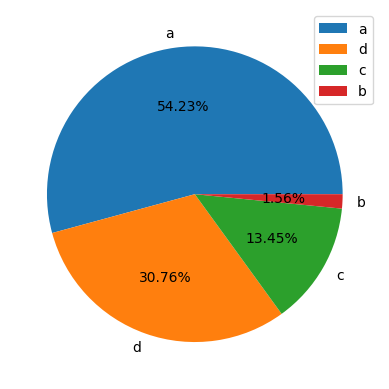

In [84]:
#Stores are of 4 types a,b,c,d where a has maximum of 54.23% and b has minimum of 1.56%.
plt.pie(y,labels=label,autopct="%1.2f%%")
plt.legend()
plt.show()

<AxesSubplot:xlabel='Assortment', ylabel='count'>

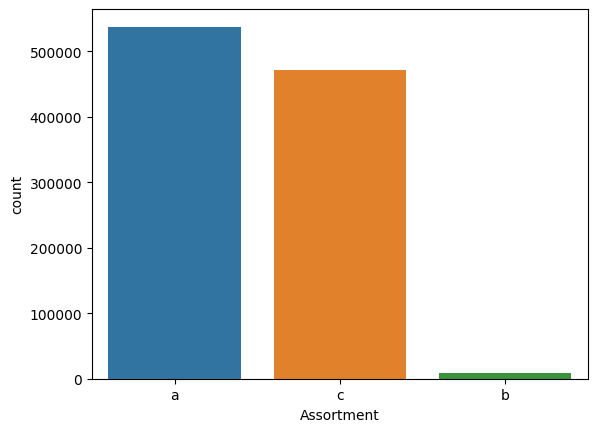

In [85]:
ax=sns.countplot(x=df["Assortment"])
ax

In [86]:
type_Assortment=df["Assortment"].value_counts()
type_Assortment

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64

In [87]:
label_Assortment=type_Assortment.index
label_Assortment

Index(['a', 'c', 'b'], dtype='object')

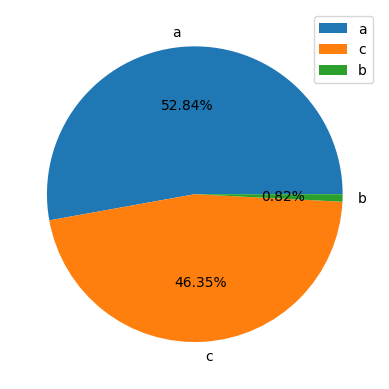

In [88]:
#store has 3 assortment level a=basic, b=extra and c=extended.There are maximum of basic level store with 52.84% where as extra 
#level store is minimum with 0.82%.
plt.pie(type_Assortment,labels=label_Assortment,autopct="%1.2f%%")
plt.legend()
plt.show()

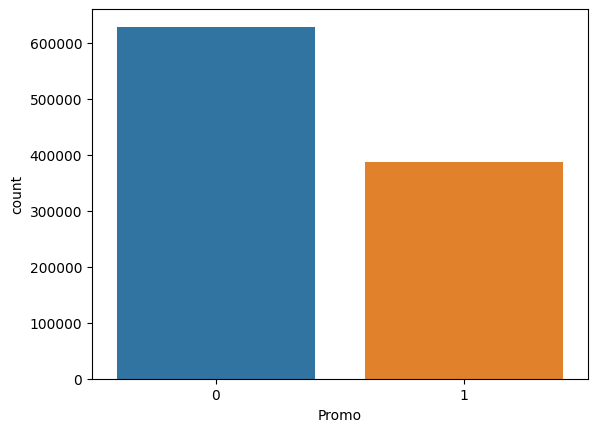

In [89]:
ax=sns.countplot(x=df["Promo"])

In [90]:
type_Promo=df["Promo"].value_counts()
type_Promo

0    629129
1    388080
Name: Promo, dtype: int64

In [91]:
label_Promo=type_Promo.index
label_Promo

Int64Index([0, 1], dtype='int64')

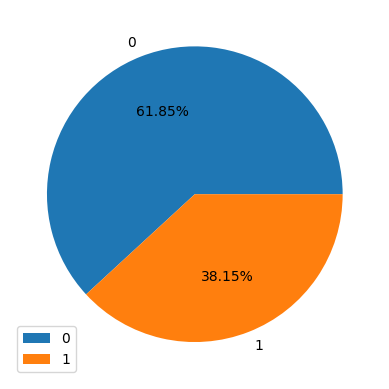

In [92]:
#61.85% of the stores are not running promo whereas 38.15% stores are running promos.
plt.pie(type_Promo,labels=label_Promo,autopct="%1.2f%%")
plt.legend()
plt.show()

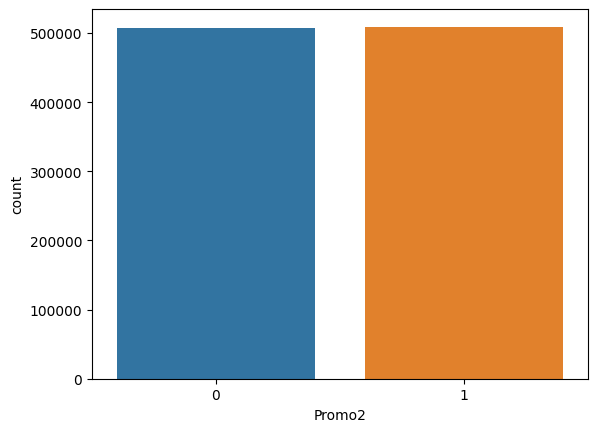

In [93]:
ax=sns.countplot(x=df["Promo2"])

In [94]:
type_Promo2=df["Promo2"].value_counts()
type_Promo2

1    509178
0    508031
Name: Promo2, dtype: int64

In [95]:
label_Promo2=type_Promo2.index
label_Promo2

Int64Index([1, 0], dtype='int64')

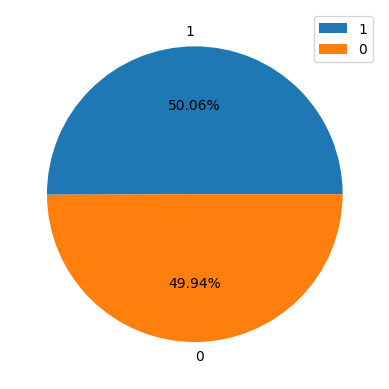

In [96]:
#Out of those 38% who are running promo 50% of the store continues the promotion whereas 50% stopped.
plt.pie(type_Promo2,labels=label_Promo2,autopct="%1.2f%%")
plt.legend()
plt.show()

In [97]:
df['Sales'].mean()

5773.818972305593

In [98]:
print(df[df['StoreType']=='a']['Sales'].mean())
print(df[df['StoreType']=='b']['Sales'].mean())
print(df[df['StoreType']=='c']['Sales'].mean())
print(df[df['StoreType']=='d']['Sales'].mean())

5738.179710202728
10058.837334175616
5723.6292458345515
5641.819243109884


Text(0.5, 1.0, 'Sales and CompetitionOpenSinceYear')

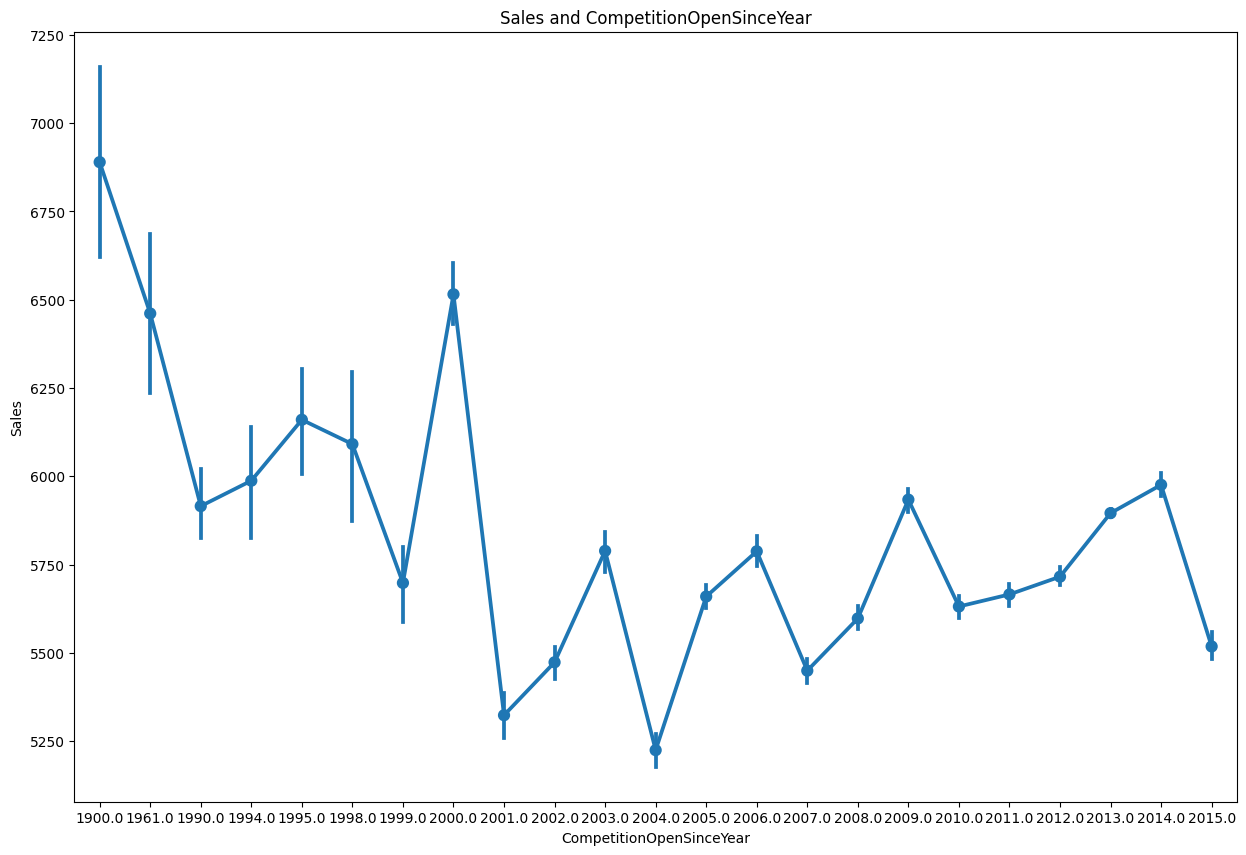

In [99]:
#in the year 1900 the sale is highest because of low competition but as the year pass on the competion increases and sales decreases
plt.figure(figsize=(15,10))
sns.pointplot(x=df['CompetitionOpenSinceYear'],y=df['Sales'])
plt.title("Sales and CompetitionOpenSinceYear")

Text(0.5, 1.0, 'Sales and Promo2SinceYear')

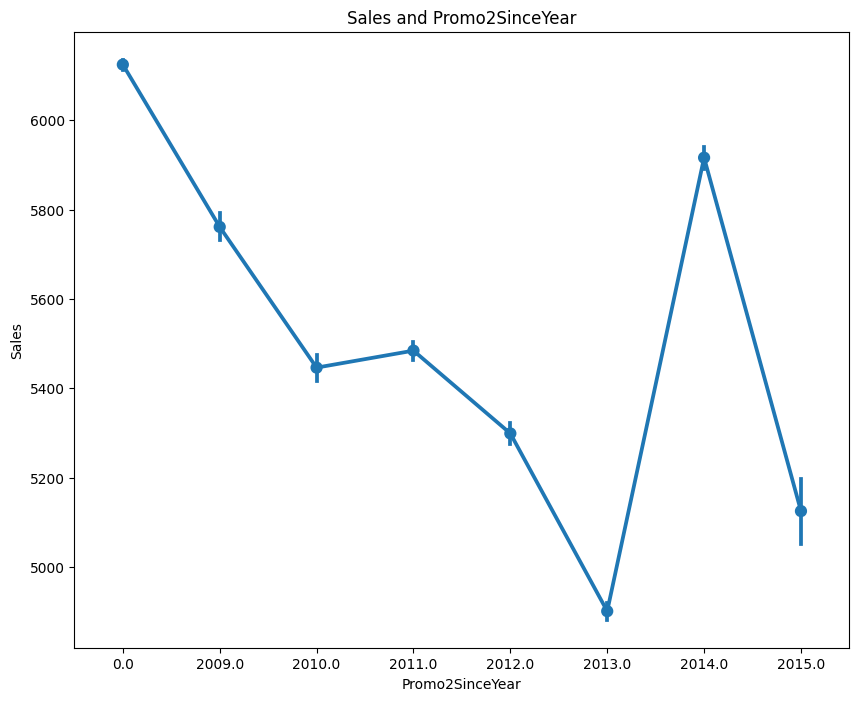

In [100]:
#The sale in 2013 and 2015 is lowest despite promotion.This may be because of increase in competition year by year. 
plt.figure(figsize=(10,8))
sns.pointplot(x=df['Promo2SinceYear'],y=df['Sales'])
plt.title("Sales and Promo2SinceYear")

Text(0.5, 1.0, 'Sales and Dayofweek')

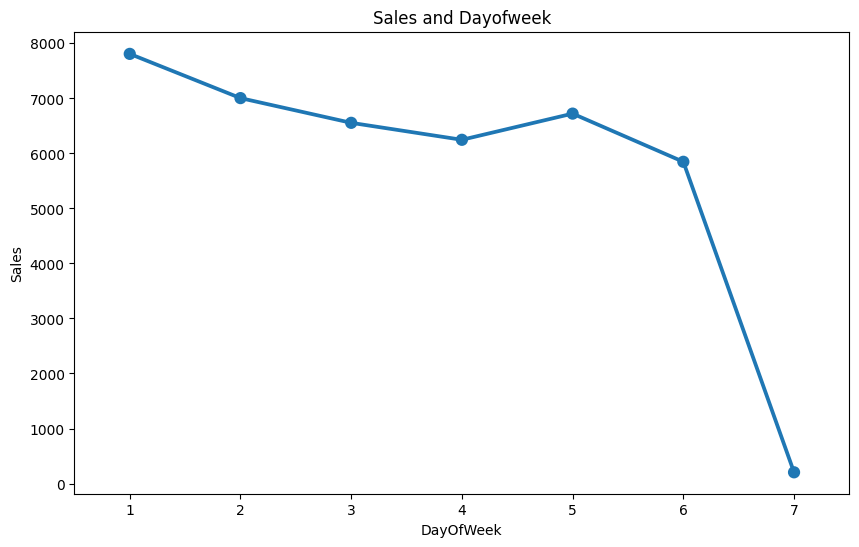

In [101]:
#Sales on day1 which is monday is highest and it decreases day by day till day 6 which is saturday. It drastically 
#decreases on day 7 because sunday most of the stores remain close.
plt.figure(figsize=(10,6))
sns.pointplot(x=df['DayOfWeek'],y=df['Sales'])
plt.title("Sales and Dayofweek")

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since Month')

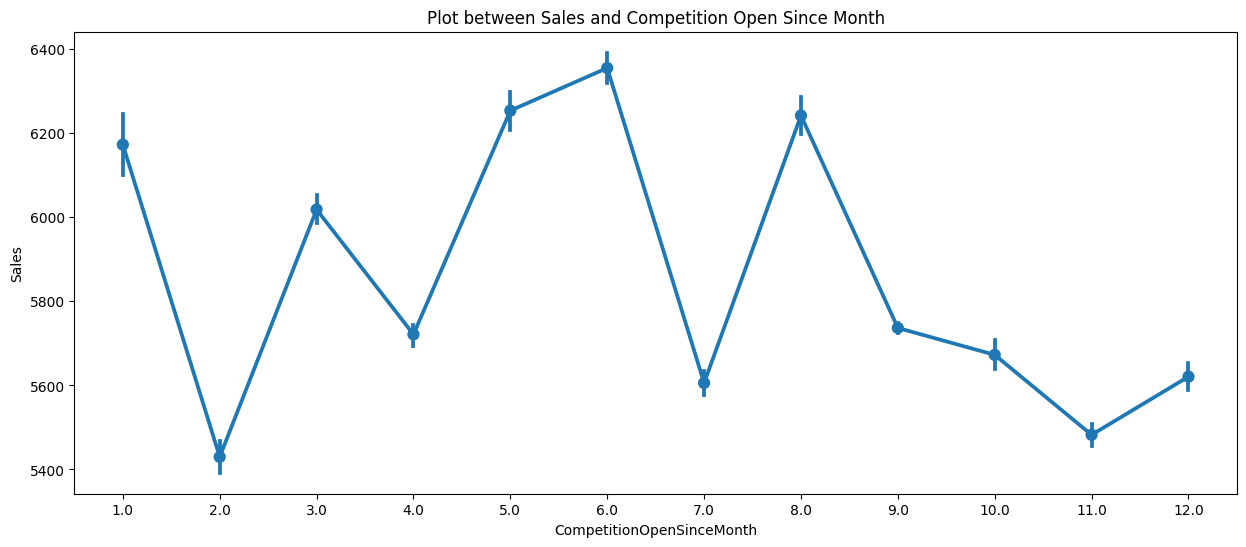

In [102]:
#In the month of january june and august the competion is most and lowest in the month of february and november
plt.figure(figsize=(15,6))
sns.pointplot(x= df['CompetitionOpenSinceMonth'], y= df['Sales'])
plt.title('Plot between Sales and Competition Open Since Month')

Text(0.5, 1.0, 'storetype and sales')

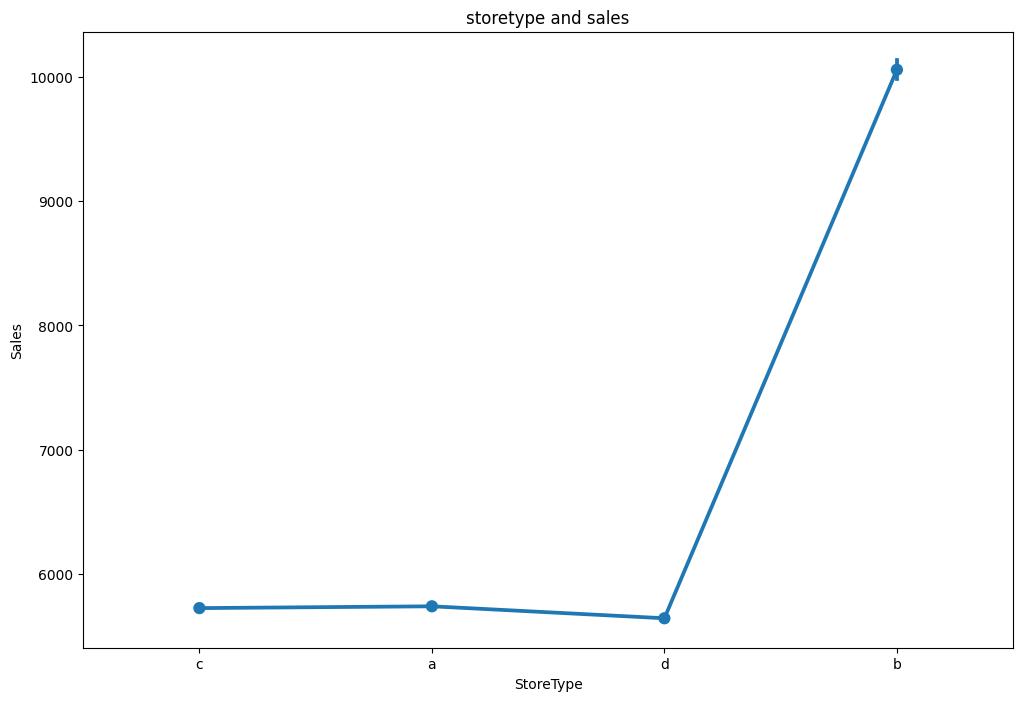

In [103]:
#storetype b has highest number of sales
plt.figure(figsize=(12,8))
sns.pointplot(x=df['StoreType'],y=df['Sales'])
plt.title("storetype and sales")

Text(0.5, 1.0, 'assortment and sales')

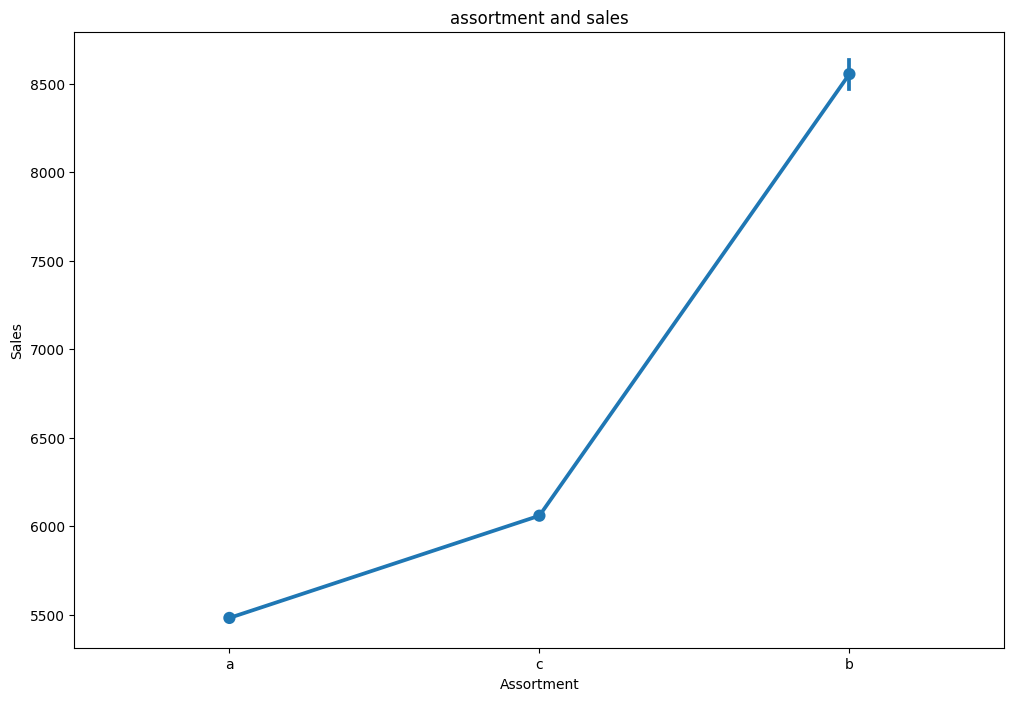

In [104]:
#Assortment level b has highest number of sales
plt.figure(figsize=(12,8))
sns.pointplot(x=df['Assortment'],y=df['Sales'])
plt.title("assortment and sales")

Text(0.5, 1.0, 'Store Daily Open Countplot')

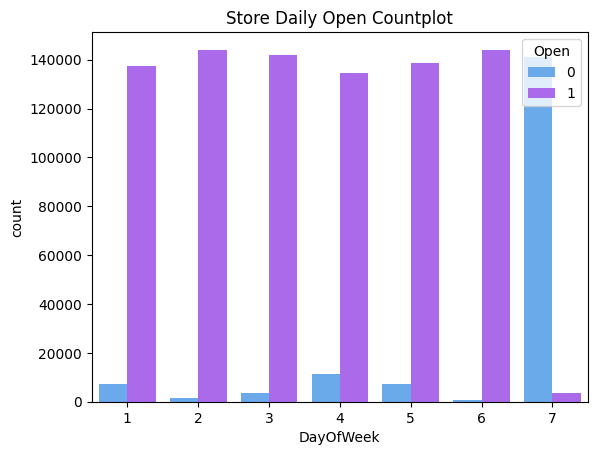

In [105]:
#On day 7 most of the stores remain closed
sns.countplot(x= df['DayOfWeek'], hue=df['Open'], palette='cool')
plt.title('Store Daily Open Countplot')

Text(0.5, 1.0, 'Store Daily Promo Countplot')

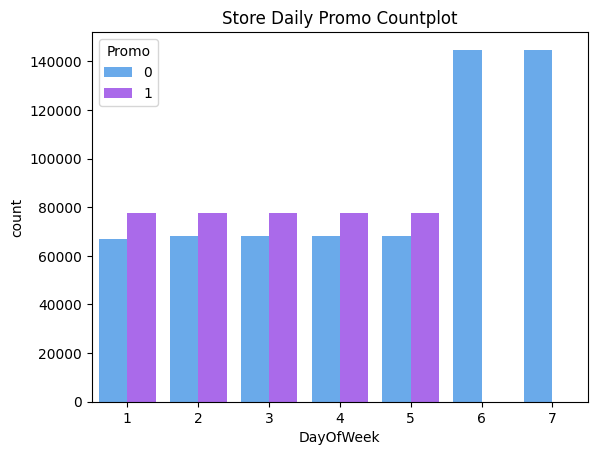

In [106]:
#On day6 and day7 there is no promo because of weekend
sns.countplot(x=df['DayOfWeek'],hue=df['Promo'],palette='cool')
plt.title('Store Daily Promo Countplot')

<AxesSubplot:xlabel='Promo', ylabel='Sales'>

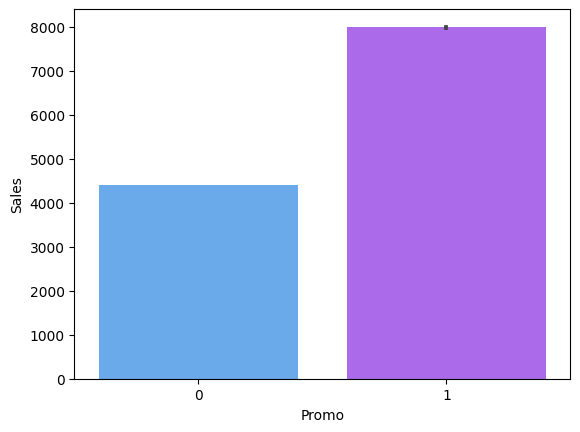

In [107]:
#store who took promotions there sale is higher compare to those who haven't opted for promotions.
sns.barplot(x=df['Promo'],y=df['Sales'],palette='cool')

In [108]:
df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [109]:
#changing the datatype of StateHoliday to int
df.loc[df['StateHoliday'] == '0', 'StateHoliday'] = 0
df.loc[df['StateHoliday'] == 'a', 'StateHoliday'] = 1
df.loc[df['StateHoliday'] == 'b', 'StateHoliday'] = 2
df.loc[df['StateHoliday'] == 'c', 'StateHoliday'] = 3
df['StateHoliday'] = df['StateHoliday'].astype(int, copy=False)

In [110]:
df['StateHoliday'].value_counts()

0    986159
1     20260
2      6690
3      4100
Name: StateHoliday, dtype: int64

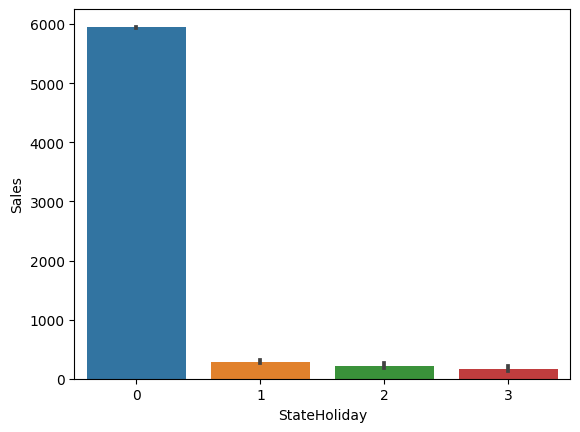

In [111]:
#Sales on pubic holiday is highest
State_HolidaySales=sns.barplot(x=df['StateHoliday'],y=df['Sales'])

In [112]:
type_StateHoliday=df['StateHoliday'].value_counts()
type_StateHoliday

0    986159
1     20260
2      6690
3      4100
Name: StateHoliday, dtype: int64

In [113]:
label_StateHoliday=type_StateHoliday.index
label_StateHoliday

Int64Index([0, 1, 2, 3], dtype='int64')

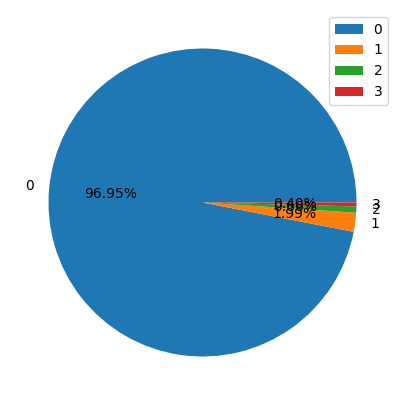

In [114]:
plt.figure(figsize=(5,5))
plt.pie(type_StateHoliday,labels=label_StateHoliday,autopct="%1.2f%%")
plt.legend()
plt.show()

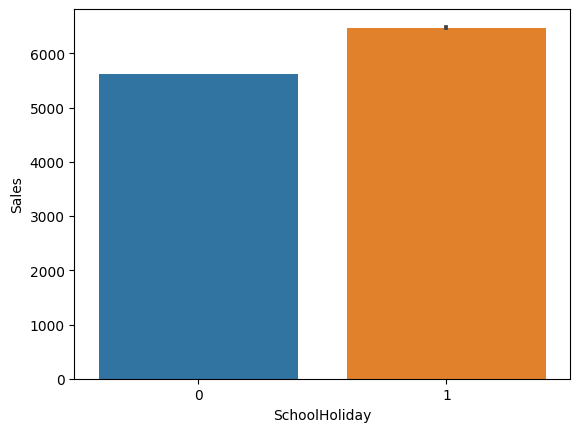

In [115]:
#Store which are open during the school holidays have more sale than the normal holidays
schoolholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=df)

In [116]:
df2=df.copy()

In [117]:
df2

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,2013,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,2013,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,2013,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,2013,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [118]:
#date column is dropped
df2.drop(['Date'],axis=1,inplace=True)

In [119]:
df2.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'Week',
       'WeekOfYear', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [120]:
df2.shape

(1017209, 22)

In [121]:
#two new columns CompetitionOpen and PromoOpen is added
df2['CompetitionOpen']=0
df2['PromoOpen']=0

In [122]:
df2

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
0,1,5,5263,555,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0,0
1,1,4,5020,546,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0,0
2,1,3,4782,523,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0,0
3,1,2,5011,560,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0,0
4,1,1,6102,612,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,0
1017205,1115,5,4540,326,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,0
1017206,1115,4,4297,300,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,0
1017207,1115,3,3697,305,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0,0


In [123]:
#CompetitionOpen is created to measure the more accurate period in months when the nearest competition has opened
df2['CompetitionOpen'] = (df2['CompetitionOpen'].where(df2['CompetitionOpenSinceYear'] == 0, other= (12 * (df2['Year'] - df2['CompetitionOpenSinceYear'])) + (df2['Month'] - df2['CompetitionOpenSinceMonth'])))

In [124]:
#PromoOpen has opened to measure more accurate period in month when nearest competition has opened
df2['PromoOpen'] = ( 12 * (df2['Year'] - df['Promo2SinceYear'])) + df2['Month'] - ((df2['Promo2SinceWeek']/4))

In [125]:
df2

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
0,1,5,5263,555,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,24187.0
1,1,4,5020,546,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,24187.0
2,1,3,4782,523,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,24187.0
3,1,2,5011,560,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,24187.0
4,1,1,6102,612,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,24187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",-8.0,7.5
1017205,1115,5,4540,326,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",-8.0,7.5
1017206,1115,4,4297,300,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",-8.0,7.5
1017207,1115,3,3697,305,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",-8.0,7.5


In [126]:
# we can make these PromoOpen negative values to zeros, because they have not started the promos at that time
df2.loc[df2['PromoOpen']<0,'PromoOpen']=0

In [127]:
df2.shape

(1017209, 24)

In [128]:
df2[df2['PromoOpen']<0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen


In [129]:
df2.loc[df2['CompetitionOpen']<0,'CompetitionOpen']=0

In [130]:
df2.shape

(1017209, 24)

In [131]:
df2[df2['CompetitionOpen']<0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen


In [132]:
df2['CompetitionOpen'].value_counts()

0.0       186813
6.0        17418
4.0        17377
8.0        17348
7.0        17074
           ...  
1357.0        28
199.0         28
616.0         28
1381.0        28
628.0         28
Name: CompetitionOpen, Length: 336, dtype: int64

In [133]:
df2['PromoOpen'].value_counts()

0.0        70285
24187.0    16864
24173.0    16864
24159.0    16864
24161.0    16864
           ...  
56.0          31
49.0          31
48.0          31
46.0          31
47.0          30
Name: PromoOpen, Length: 293, dtype: int64

In [134]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Sales                      1017209 non-null  int64  
 3   Customers                  1017209 non-null  int64  
 4   Open                       1017209 non-null  int64  
 5   Promo                      1017209 non-null  int64  
 6   StateHoliday               1017209 non-null  int32  
 7   SchoolHoliday              1017209 non-null  int64  
 8   Year                       1017209 non-null  int64  
 9   Month                      1017209 non-null  int64  
 10  Day                        1017209 non-null  int64  
 11  Week                       1017209 non-null  int64  
 12  WeekOfYear                 1017209 non-null  int64  
 13  StoreType   

In [135]:
df2['PromoOpen'].max()

24187.0

In [136]:
df2['PromoOpen'].min()

0.0

In [137]:
# some negative and some huge values are there
# first I will convert the values to zero in PromoOpen which is having Promo2 = 0, because they have not started any promo so
# no open promo.
df2[df2['Promo2']==0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
0,1,5,5263,555,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,24187.0
1,1,4,5020,546,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,24187.0
2,1,3,4782,523,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,24187.0
3,1,2,5011,560,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,24187.0
4,1,1,6102,612,1,1,0,1,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,24187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016262,1114,6,18856,3065,1,0,0,0,2013,1,...,c,870.0,9.0,2013.0,0,0.0,0.0,0,0.0,24157.0
1016263,1114,5,18371,3036,1,0,0,1,2013,1,...,c,870.0,9.0,2013.0,0,0.0,0.0,0,0.0,24157.0
1016264,1114,4,18463,3211,1,0,0,1,2013,1,...,c,870.0,9.0,2013.0,0,0.0,0.0,0,0.0,24157.0
1016265,1114,3,20642,3401,1,0,0,1,2013,1,...,c,870.0,9.0,2013.0,0,0.0,0.0,0,0.0,24157.0


In [138]:
df2.loc[df2['Promo2']==0,'PromoOpen']=0

In [139]:
df2[df2['Promo']==0]

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpen,PromoOpen
5,1,7,0,0,0,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,0.0
6,1,6,4364,500,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,0.0
7,1,5,3706,459,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,0.0
8,1,4,3769,503,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,0.0
9,1,3,3464,463,1,0,0,0,2015,7,...,a,1270.0,9.0,2008.0,0,0.0,0.0,0,82.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0.0,7.5
1017205,1115,5,4540,326,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0.0,7.5
1017206,1115,4,4297,300,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0.0,7.5
1017207,1115,3,3697,305,1,0,0,1,2013,1,...,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",0.0,7.5


In [140]:
df2['PromoOpen'].value_counts()

0.00     578316
39.75      4245
23.50      4169
24.50      4138
21.50      4134
          ...  
56.00        31
49.00        31
48.00        31
46.00        31
47.00        30
Name: PromoOpen, Length: 262, dtype: int64

In [141]:
# now we can remove the CompetitionOpenSinceMonth CompetitionOpenSinceYear Promo2 Promo2SinceWeek Promo2SinceYear
df2.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear'],axis=1,inplace=True)

In [142]:
df2.shape

(1017209, 19)

In [143]:
df2

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Week,WeekOfYear,StoreType,Assortment,CompetitionDistance,PromoInterval,CompetitionOpen,PromoOpen
0,1,5,5263,555,1,1,0,1,2015,7,31,3,31,c,a,1270.0,0,82.0,0.0
1,1,4,5020,546,1,1,0,1,2015,7,30,3,31,c,a,1270.0,0,82.0,0.0
2,1,3,4782,523,1,1,0,1,2015,7,29,3,31,c,a,1270.0,0,82.0,0.0
3,1,2,5011,560,1,1,0,1,2015,7,28,3,31,c,a,1270.0,0,82.0,0.0
4,1,1,6102,612,1,1,0,1,2015,7,27,3,31,c,a,1270.0,0,82.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,4771,339,1,0,0,1,2013,1,5,1,1,d,c,5350.0,"Mar,Jun,Sept,Dec",0.0,7.5
1017205,1115,5,4540,326,1,0,0,1,2013,1,4,1,1,d,c,5350.0,"Mar,Jun,Sept,Dec",0.0,7.5
1017206,1115,4,4297,300,1,0,0,1,2013,1,3,1,1,d,c,5350.0,"Mar,Jun,Sept,Dec",0.0,7.5
1017207,1115,3,3697,305,1,0,0,1,2013,1,2,1,1,d,c,5350.0,"Mar,Jun,Sept,Dec",0.0,7.5


In [144]:
#convert StoreType and Assortment into dummy variables of 1 and 0
df2=pd.get_dummies(columns=['StoreType','Assortment'],data=df2,drop_first=True)

In [145]:
i_sales=df2[df2['Sales']==0].index

In [146]:
df2.drop(i_sales,inplace=True)

In [147]:
df2.reset_index(inplace=True)

In [148]:
df2

,index,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,WeekOfYear,CompetitionDistance,PromoInterval,CompetitionOpen,PromoOpen,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,0,1,5,5263,555,1,1,0,1,2015,...,31,1270.0,0,82.0,0.0,0,1,0,0,0
1,1,1,4,5020,546,1,1,0,1,2015,...,31,1270.0,0,82.0,0.0,0,1,0,0,0
2,2,1,3,4782,523,1,1,0,1,2015,...,31,1270.0,0,82.0,0.0,0,1,0,0,0
3,3,1,2,5011,560,1,1,0,1,2015,...,31,1270.0,0,82.0,0.0,0,1,0,0,0
4,4,1,1,6102,612,1,1,0,1,2015,...,31,1270.0,0,82.0,0.0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,1017202,1115,1,6905,471,1,1,0,1,2013,...,2,5350.0,"Mar,Jun,Sept,Dec",0.0,7.5,0,0,1,0,1
844334,1017204,1115,6,4771,339,1,0,0,1,2013,...,1,5350.0,"Mar,Jun,Sept,Dec",0.0,7.5,0,0,1,0,1
844335,1017205,1115,5,4540,326,1,0,0,1,2013,...,1,5350.0,"Mar,Jun,Sept,Dec",0.0,7.5,0,0,1,0,1
844336,1017206,1115,4,4297,300,1,0,0,1,2013,...,1,5350.0,"Mar,Jun,Sept,Dec",0.0,7.5,0,0,1,0,1


In [149]:
col_df2 =['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'Week',
       'WeekOfYear', 'CompetitionDistance', 'PromoInterval', 'CompetitionOpen', 'PromoOpen',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'Sales']

In [150]:
df2=df2.reindex(columns=col_df2)

In [151]:
df2

,Store,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,...,CompetitionDistance,PromoInterval,CompetitionOpen,PromoOpen,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,Sales
0,1,5,555,1,1,0,1,2015,7,31,...,1270.0,0,82.0,0.0,0,1,0,0,0,5263
1,1,4,546,1,1,0,1,2015,7,30,...,1270.0,0,82.0,0.0,0,1,0,0,0,5020
2,1,3,523,1,1,0,1,2015,7,29,...,1270.0,0,82.0,0.0,0,1,0,0,0,4782
3,1,2,560,1,1,0,1,2015,7,28,...,1270.0,0,82.0,0.0,0,1,0,0,0,5011
4,1,1,612,1,1,0,1,2015,7,27,...,1270.0,0,82.0,0.0,0,1,0,0,0,6102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,1115,1,471,1,1,0,1,2013,1,7,...,5350.0,"Mar,Jun,Sept,Dec",0.0,7.5,0,0,1,0,1,6905
844334,1115,6,339,1,0,0,1,2013,1,5,...,5350.0,"Mar,Jun,Sept,Dec",0.0,7.5,0,0,1,0,1,4771
844335,1115,5,326,1,0,0,1,2013,1,4,...,5350.0,"Mar,Jun,Sept,Dec",0.0,7.5,0,0,1,0,1,4540
844336,1115,4,300,1,0,0,1,2013,1,3,...,5350.0,"Mar,Jun,Sept,Dec",0.0,7.5,0,0,1,0,1,4297


In [152]:
print(df2['CompetitionOpen'].max())
print(df2['CompetitionOpen'].min())

1386.0
0.0


In [153]:
print(df2['PromoOpen'].max())
print(df2['PromoOpen'].min())

71.25
0.0


In [154]:
df2[df2['CompetitionOpen']==1386]['Store'].unique()

array([815], dtype=int64)

In [155]:
df2[df2['PromoOpen']==71.25]['Store'].unique()

array([158, 277, 370, 612, 637, 808, 960], dtype=int64)

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_41388\2082731816.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Sales'])


<AxesSubplot:xlabel='Sales', ylabel='Density'>

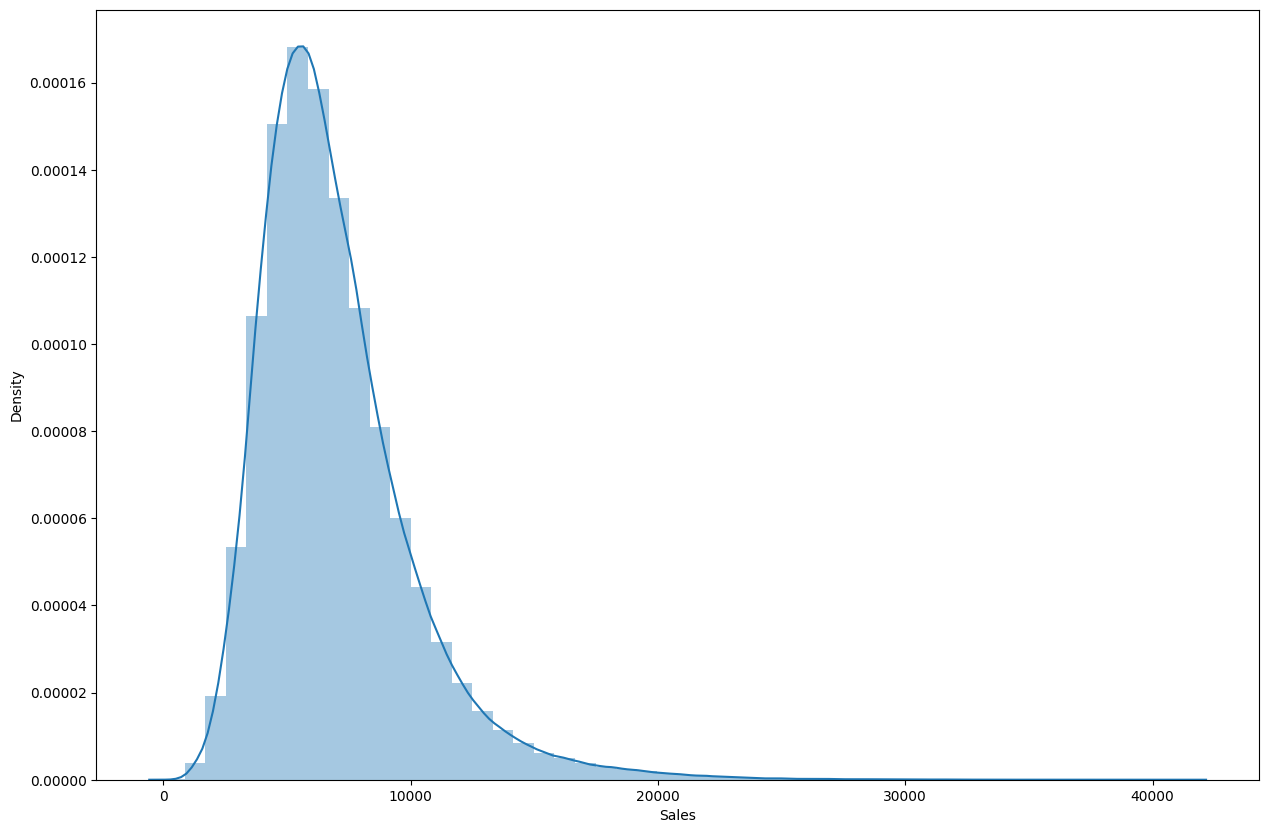

In [156]:
#sales column is right skewed so we can use log normalisation using squareroot method because in log method negative value we were getting
plt.figure(figsize=(15,10))
sns.distplot(df2['Sales'])

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_41388\1775060235.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(df2['Sales']))


<AxesSubplot:xlabel='Sales', ylabel='Density'>

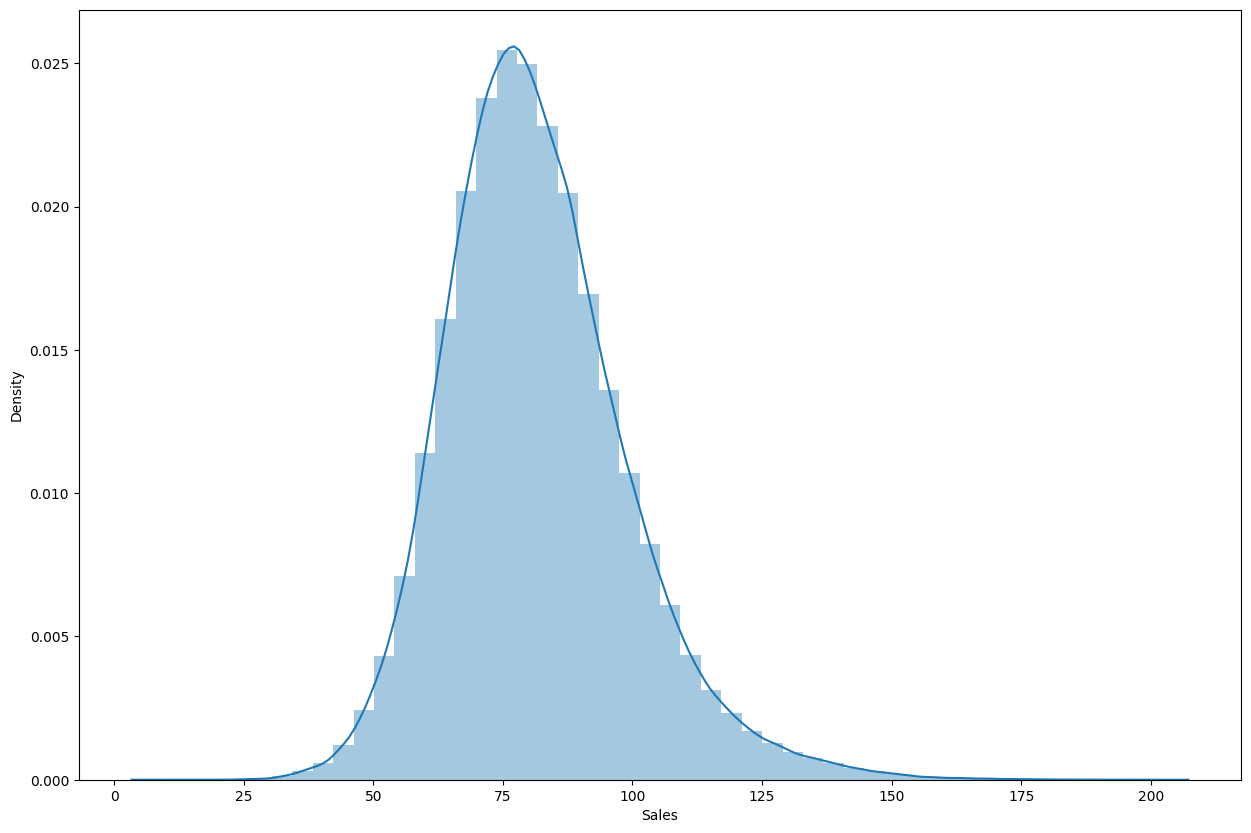

In [157]:
plt.figure(figsize=(15,10))
sns.distplot(np.sqrt(df2['Sales']))

In [158]:
df2=pd.get_dummies(columns=['PromoInterval','StateHoliday'],data=df2,drop_first=True)

In [159]:
df2

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,Week,...,StoreType_d,Assortment_b,Assortment_c,Sales,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",StateHoliday_1,StateHoliday_2,StateHoliday_3
0,1,5,555,1,1,1,2015,7,31,3,...,0,0,0,5263,0,0,0,0,0,0
1,1,4,546,1,1,1,2015,7,30,3,...,0,0,0,5020,0,0,0,0,0,0
2,1,3,523,1,1,1,2015,7,29,3,...,0,0,0,4782,0,0,0,0,0,0
3,1,2,560,1,1,1,2015,7,28,3,...,0,0,0,5011,0,0,0,0,0,0
4,1,1,612,1,1,1,2015,7,27,3,...,0,0,0,6102,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,1115,1,471,1,1,1,2013,1,7,2,...,1,0,1,6905,0,0,1,0,0,0
844334,1115,6,339,1,0,1,2013,1,5,1,...,1,0,1,4771,0,0,1,0,0,0
844335,1115,5,326,1,0,1,2013,1,4,1,...,1,0,1,4540,0,0,1,0,0,0
844336,1115,4,300,1,0,1,2013,1,3,1,...,1,0,1,4297,0,0,1,0,0,0


In [160]:
df2.describe().columns

Index(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'SchoolHoliday',
       'Year', 'Month', 'Day', 'Week', 'WeekOfYear', 'CompetitionDistance',
       'CompetitionOpen', 'PromoOpen', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_b', 'Assortment_c', 'Sales',
       'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'StateHoliday_1', 'StateHoliday_2',
       'StateHoliday_3'],
      dtype='object')

In [161]:
numeric_feature=['Customers','CompetitionDistance','CompetitionOpen','PromoOpen']

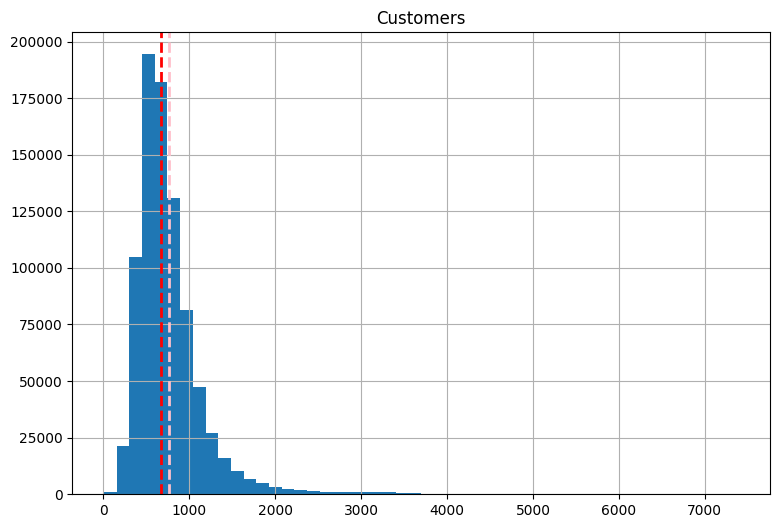

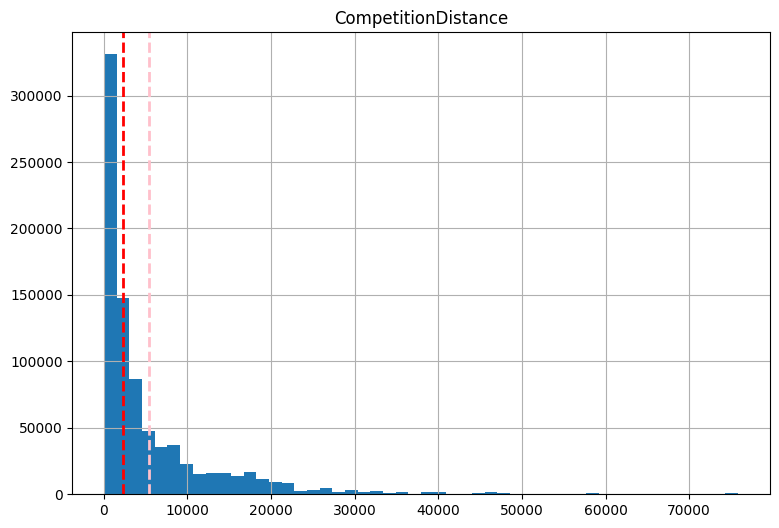

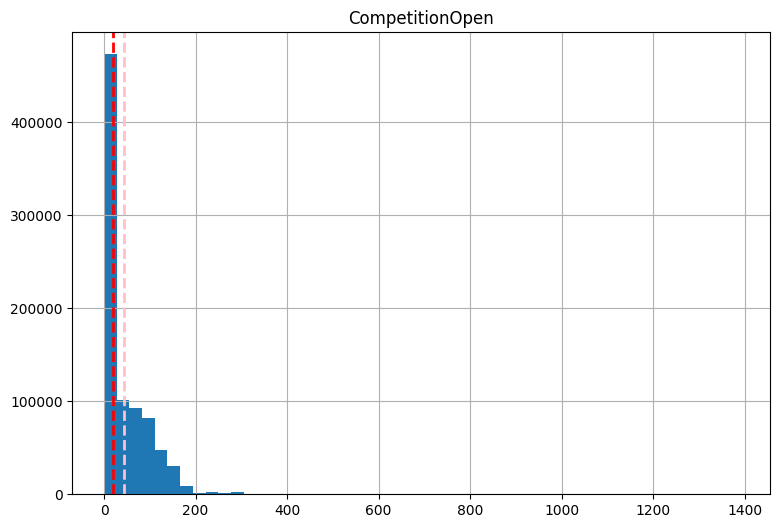

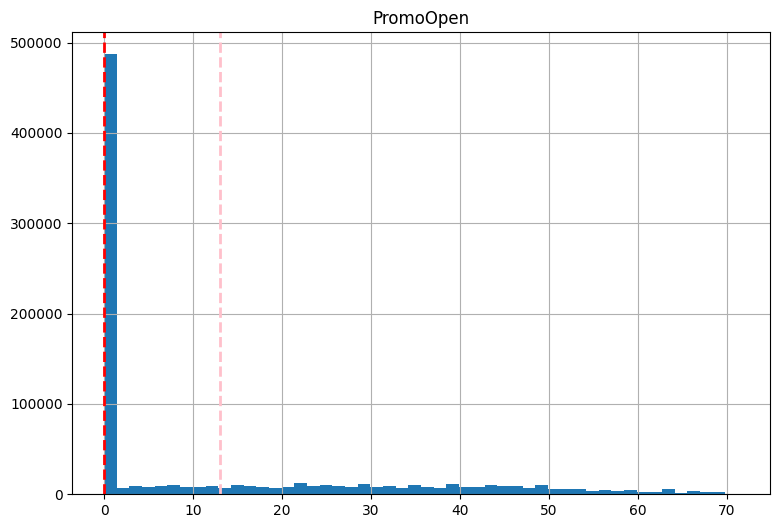

In [162]:
for col in numeric_feature:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    df2[col].hist(bins=50,ax=ax)
    ax.axvline(df2[col].mean(),color='pink',linestyle='dashed',linewidth=2)
    ax.axvline(df2[col].median(),color='red',linestyle='dashed',linewidth=2)
    ax.set_title(col)
    

In [163]:
#graphs are right skewed so we change to log normal
df2['Customer_ln']=df2['Customers'].map(lambda x:np.log(x) if x!=0 else 0)
df2['CompetitionDistance_ln']=df2['CompetitionDistance'].map(lambda x:np.log(x) if x!=0 else 0)
df2['CompetitionOpen_ln']=df2['CompetitionOpen'].map(lambda x:np.log(x) if x!=0 else 0)
df2['PromoOpen_ln']=df2['PromoOpen'].map(lambda x:np.log(x) if x!=0 else 0)


In [164]:
numeric_feature_ln=['Customer_ln','CompetitionDistance_ln','CompetitionOpen_ln','PromoOpen_ln']

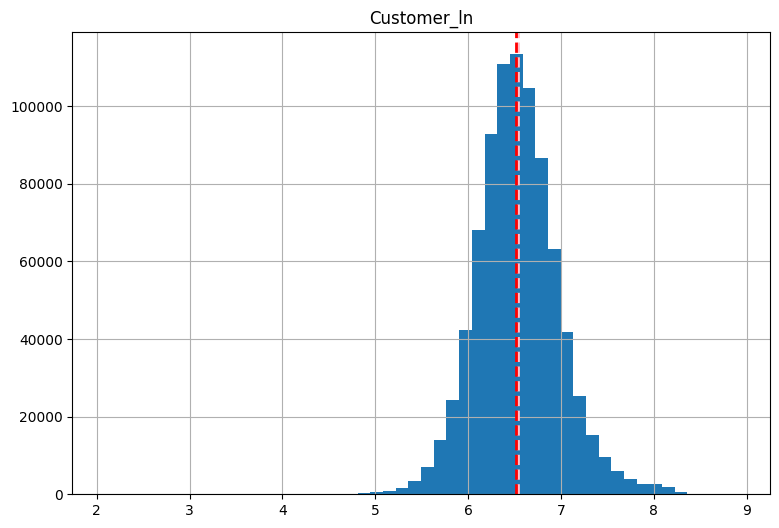

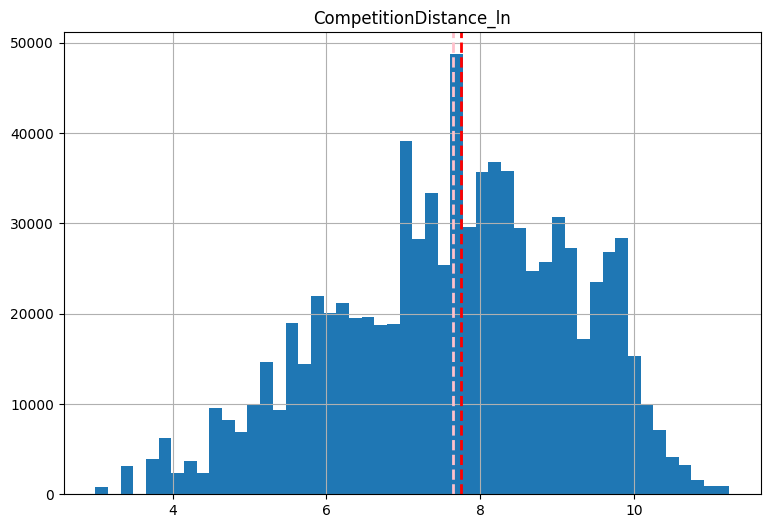

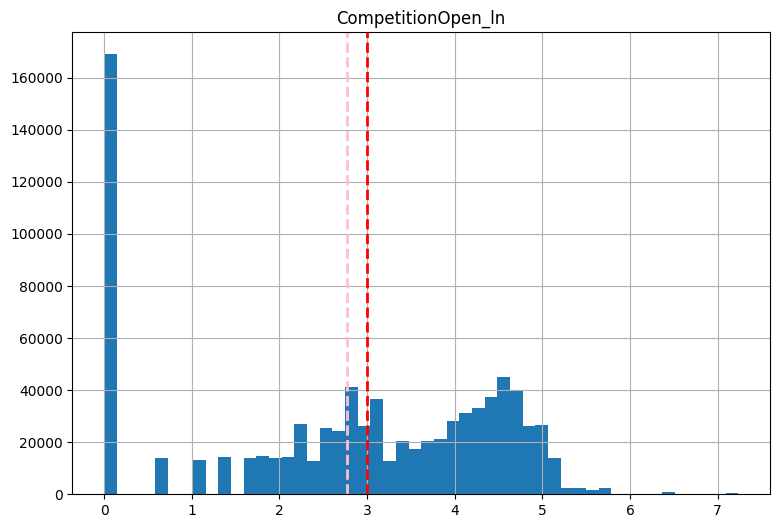

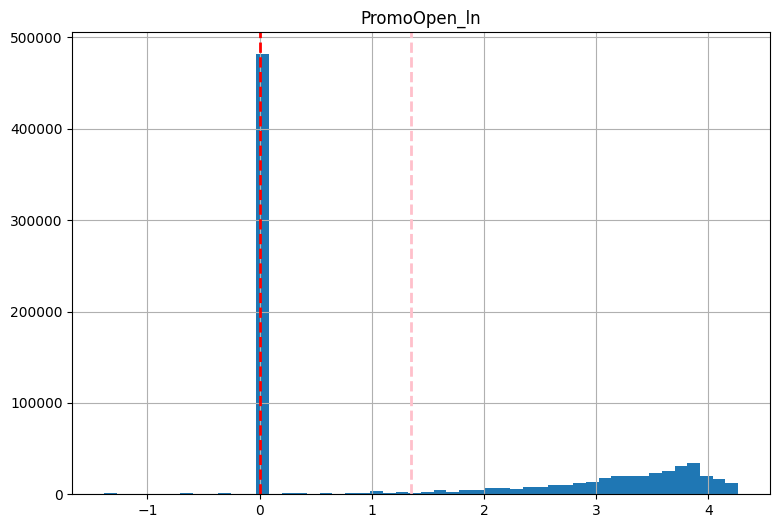

In [165]:
for col in numeric_feature_ln:
    fig=plt.figure(figsize=(9,6))
    ax=fig.gca()
    df2[col].hist(bins=50,ax=ax)
    ax.axvline(df2[col].mean(),color='pink',linestyle='dashed',linewidth=2)
    ax.axvline(df2[col].median(),color='red',linestyle='dashed',linewidth=2)
    ax.set_title(col)

<AxesSubplot:xlabel='Sales'>

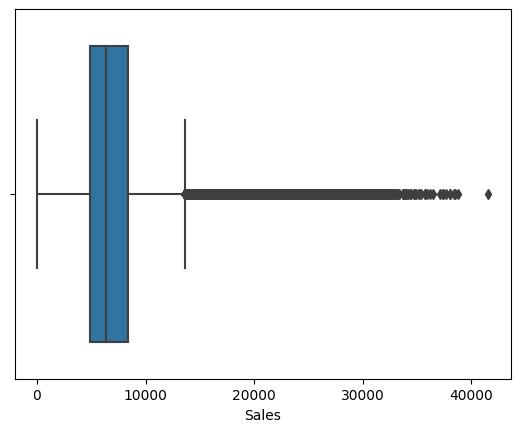

In [166]:
sns.boxplot(x=df2['Sales'])

<AxesSubplot:xlabel='Customers'>

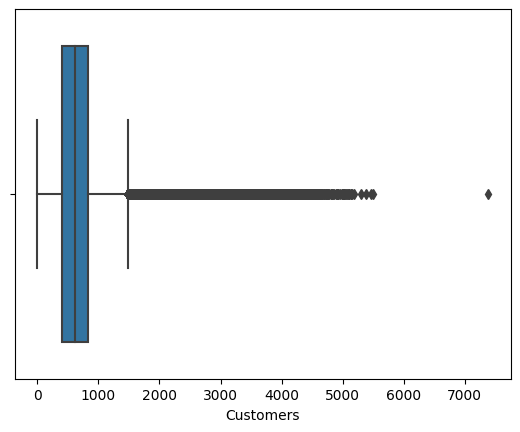

In [167]:
sns.boxplot(x=df['Customers'])

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_41388\960553283.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df2['Sales']))


<AxesSubplot:xlabel='Sales', ylabel='Density'>

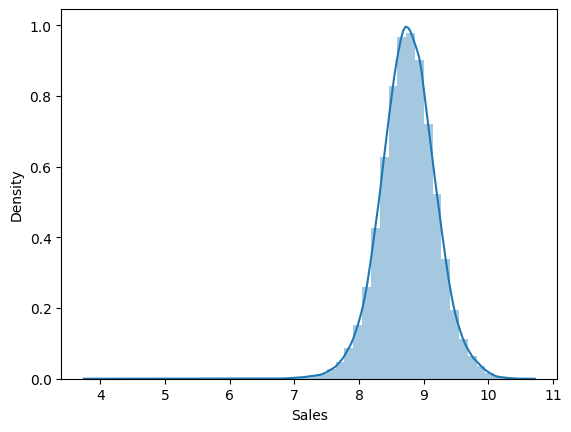

In [168]:
sns.distplot(np.log(df2['Sales']))

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_41388\3486183378.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Customers'])


<AxesSubplot:xlabel='Customers', ylabel='Density'>

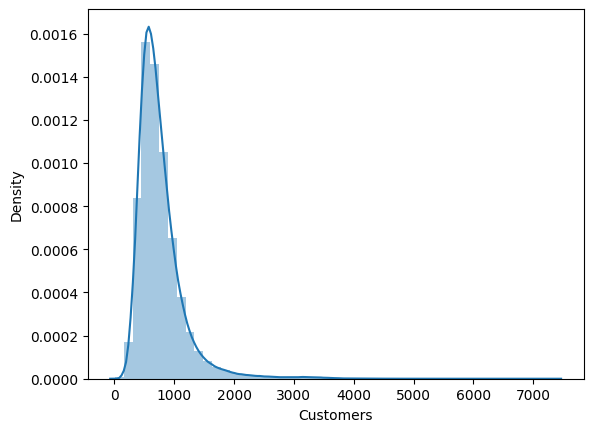

In [169]:
sns.distplot(df2['Customers'])

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_41388\3319827620.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.sqrt(df['Customers']))


<AxesSubplot:xlabel='Customers', ylabel='Density'>

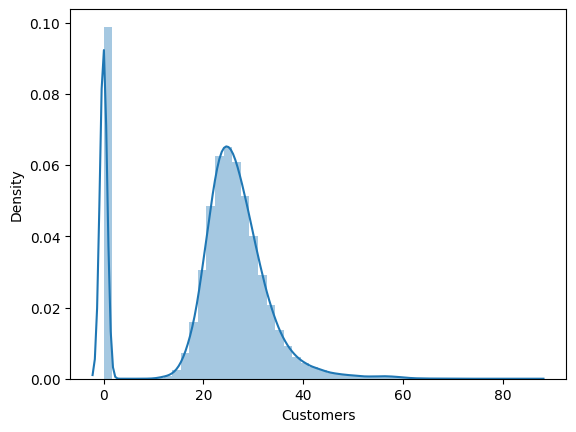

In [170]:
sns.distplot(np.sqrt(df['Customers']))

In [171]:
df2

,Store,DayOfWeek,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,Week,...,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",StateHoliday_1,StateHoliday_2,StateHoliday_3,Customer_ln,CompetitionDistance_ln,CompetitionOpen_ln,PromoOpen_ln
0,1,5,555,1,1,1,2015,7,31,3,...,0,0,0,0,0,0,6.318968,7.146772,4.406719,0.000000
1,1,4,546,1,1,1,2015,7,30,3,...,0,0,0,0,0,0,6.302619,7.146772,4.406719,0.000000
2,1,3,523,1,1,1,2015,7,29,3,...,0,0,0,0,0,0,6.259581,7.146772,4.406719,0.000000
3,1,2,560,1,1,1,2015,7,28,3,...,0,0,0,0,0,0,6.327937,7.146772,4.406719,0.000000
4,1,1,612,1,1,1,2015,7,27,3,...,0,0,0,0,0,0,6.416732,7.146772,4.406719,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,1115,1,471,1,1,1,2013,1,7,2,...,0,0,1,0,0,0,6.154858,8.584852,0.000000,2.014903
844334,1115,6,339,1,0,1,2013,1,5,1,...,0,0,1,0,0,0,5.826000,8.584852,0.000000,2.014903
844335,1115,5,326,1,0,1,2013,1,4,1,...,0,0,1,0,0,0,5.786897,8.584852,0.000000,2.014903
844336,1115,4,300,1,0,1,2013,1,3,1,...,0,0,1,0,0,0,5.703782,8.584852,0.000000,2.014903


<AxesSubplot:>

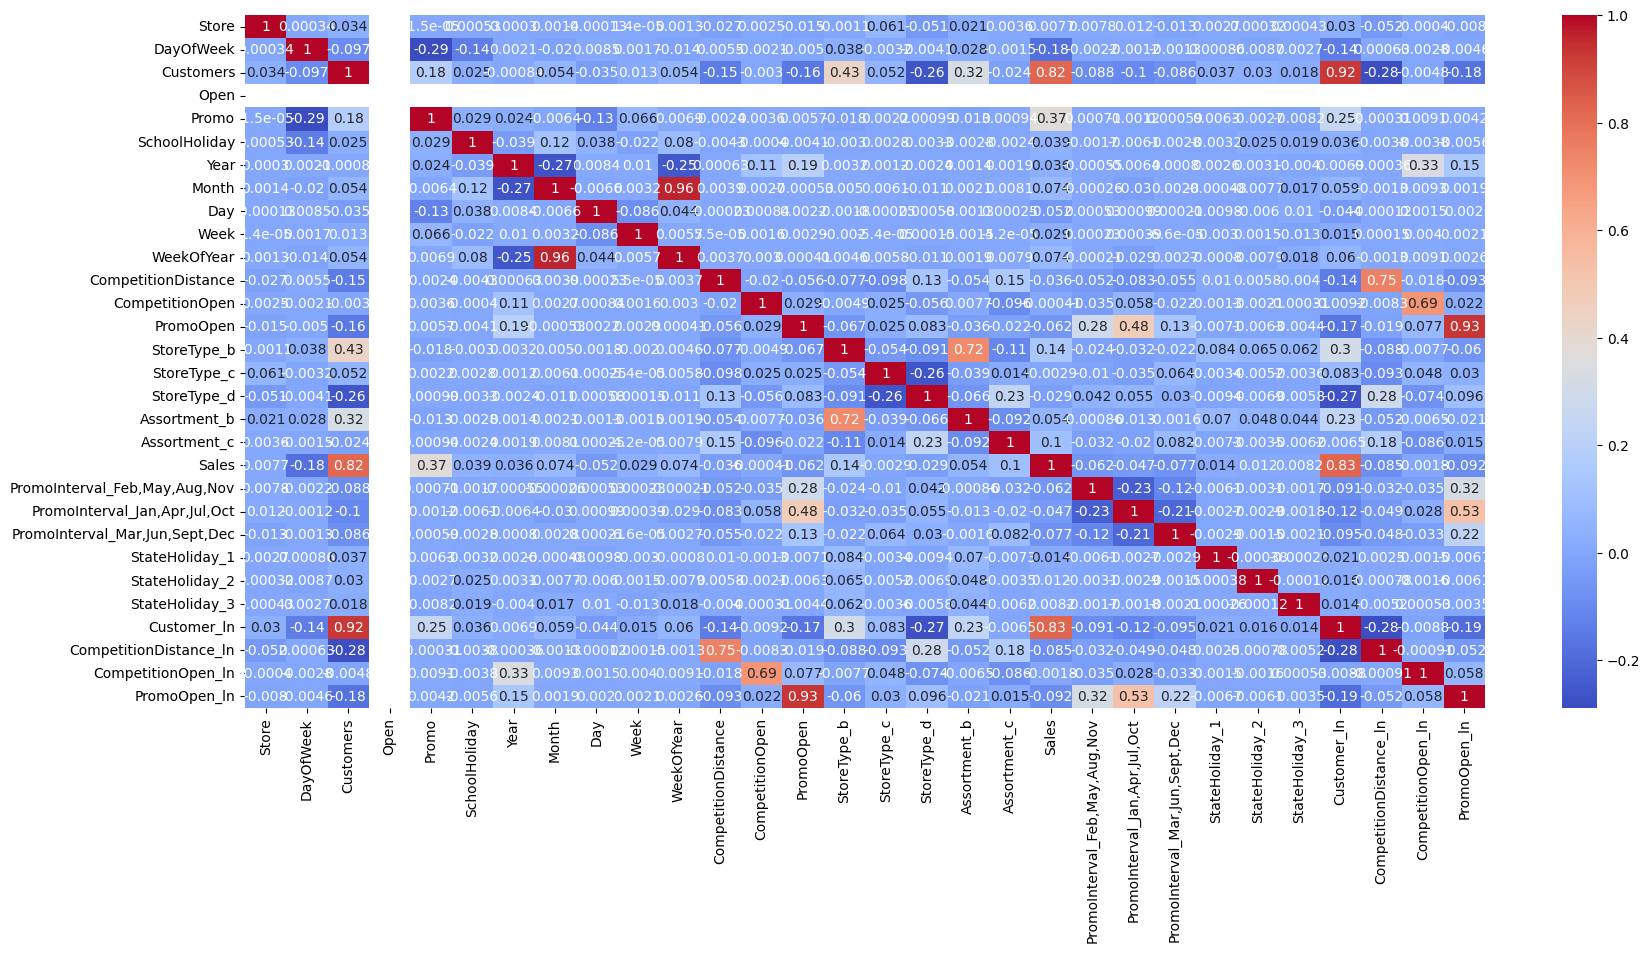

In [172]:
plt.figure(figsize=(20,9))
corr=df2.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

# Feature Engineering
Feature engineering is the pre-processing step of machine learning, which is used to transform raw data into features that can be used for creating a predictive model using Machine learning or statistical Modelling.It aims to improve the performance of models.

In [173]:
numeric_features = ['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Promo2SinceWeek',
                    'CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
                    'Promo2','Promo2SinceWeek','Promo2SinceYear']

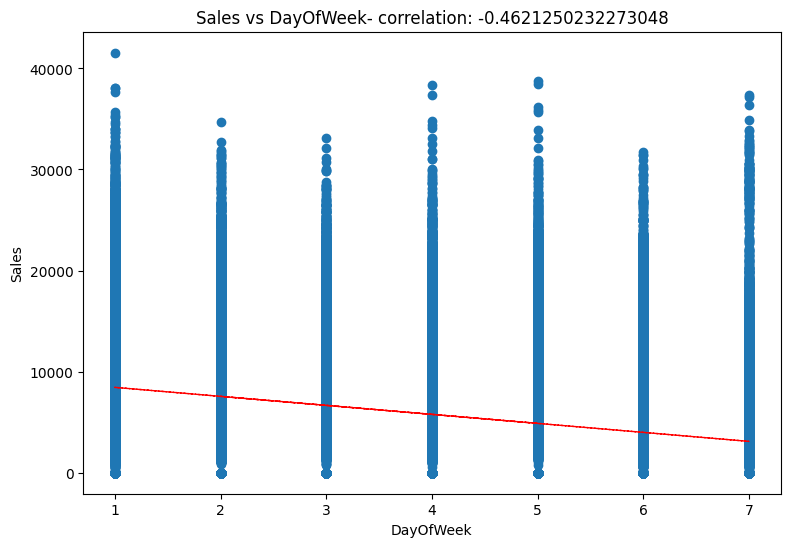

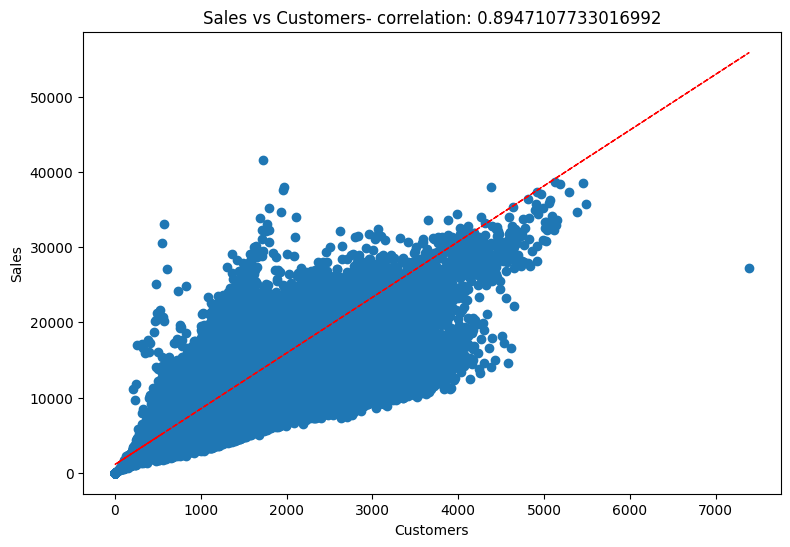

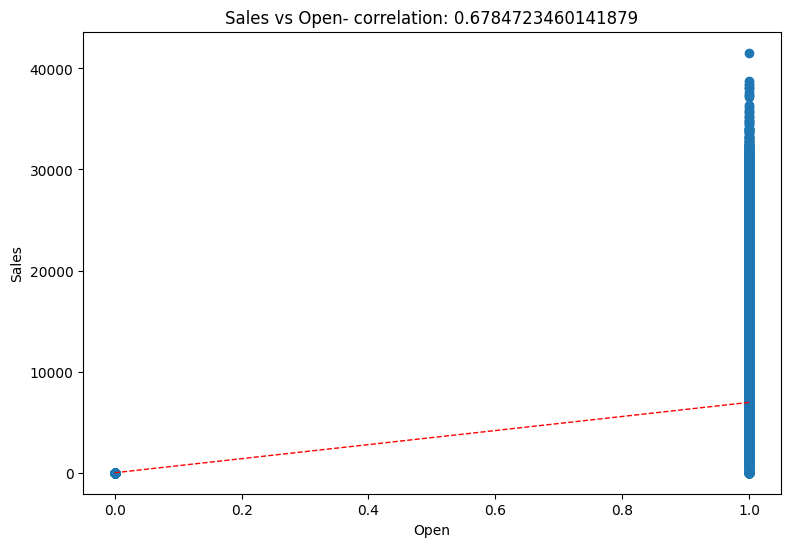

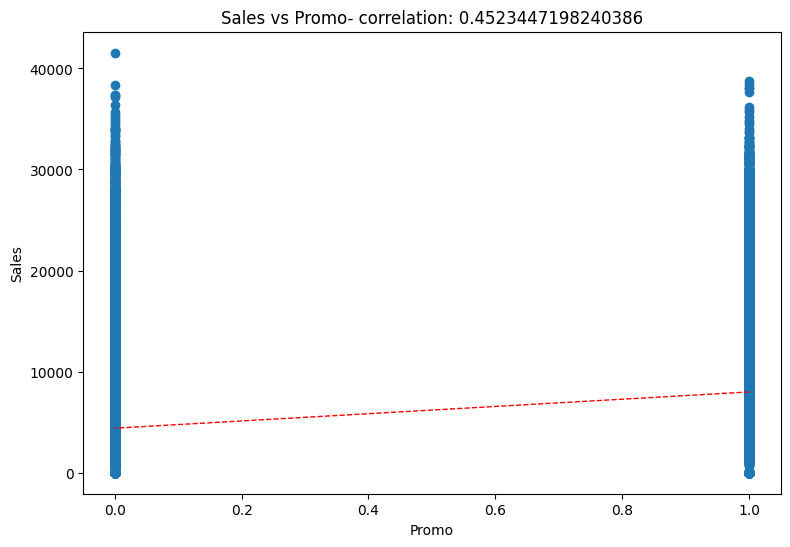

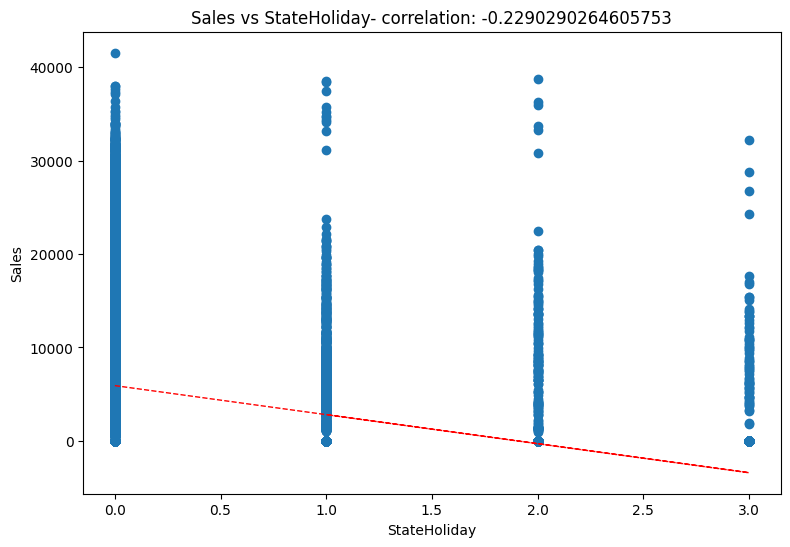

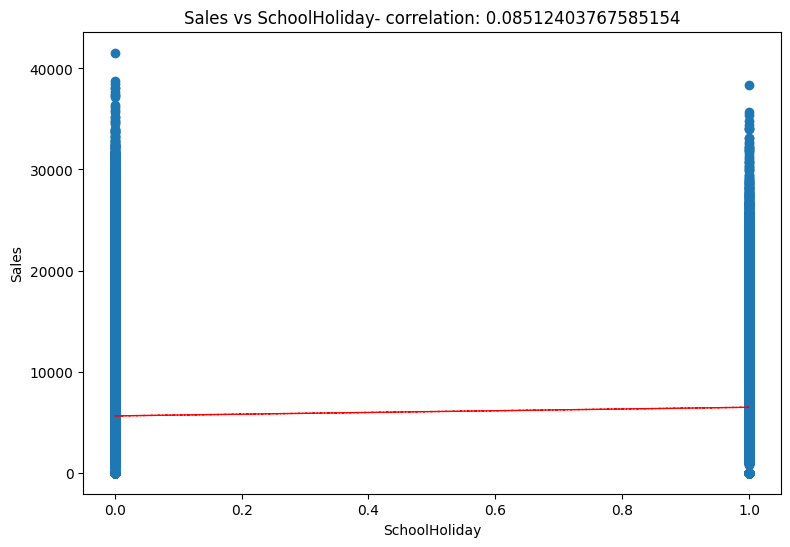

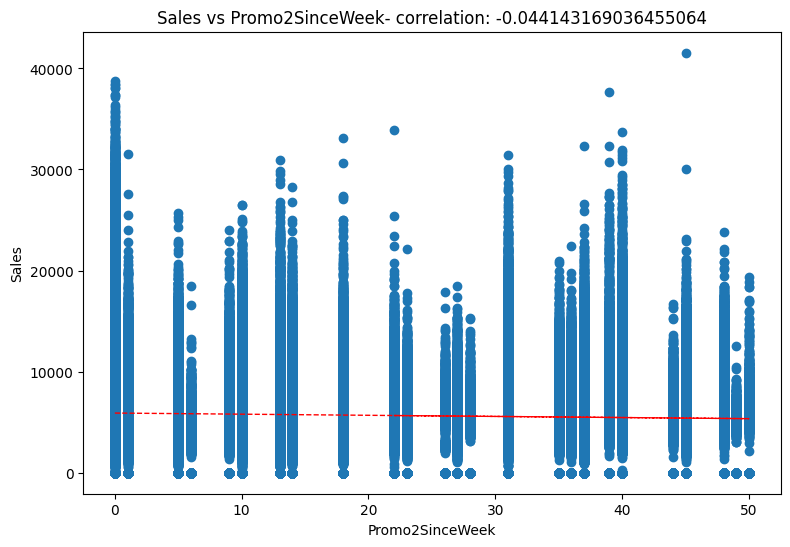

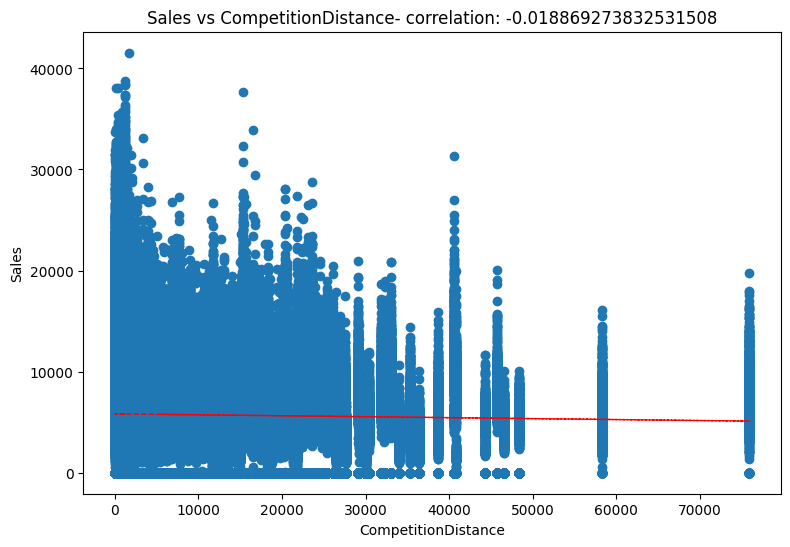

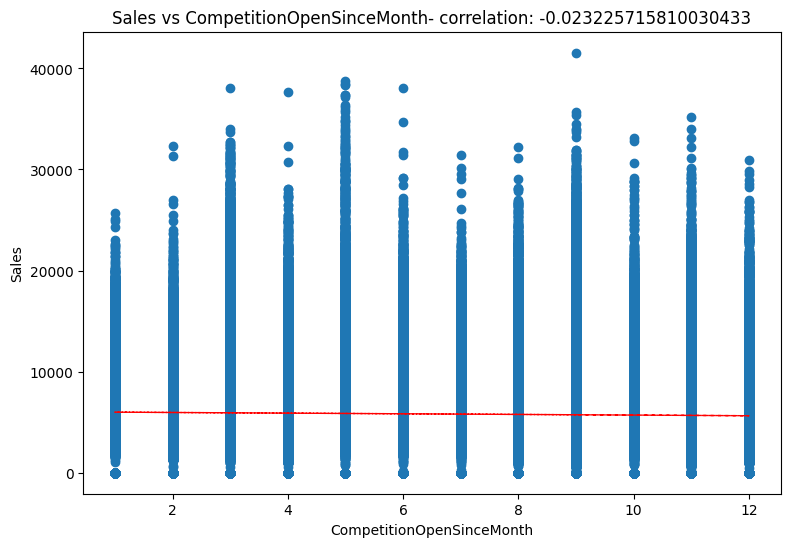

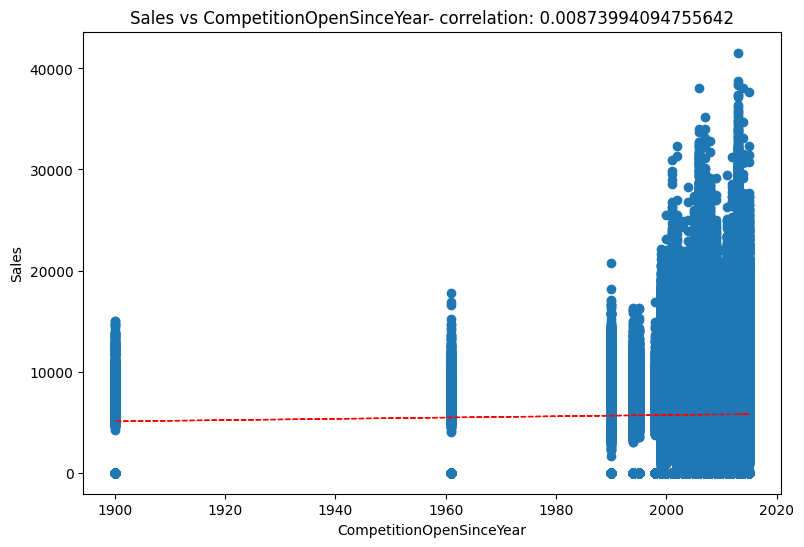

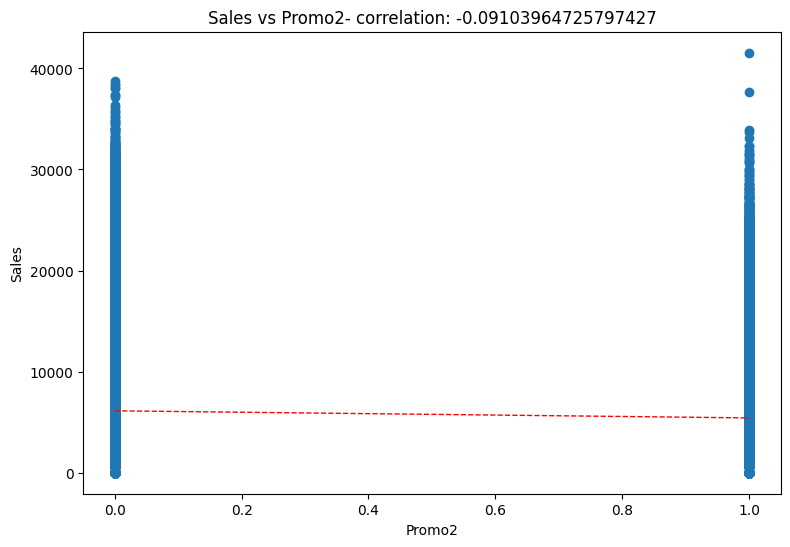

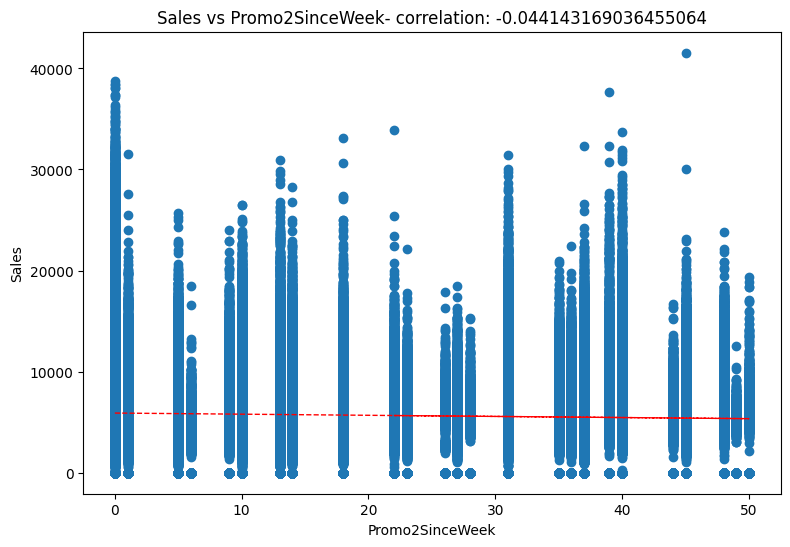

In [174]:
for col in numeric_features[0:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Sales'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

<AxesSubplot:>

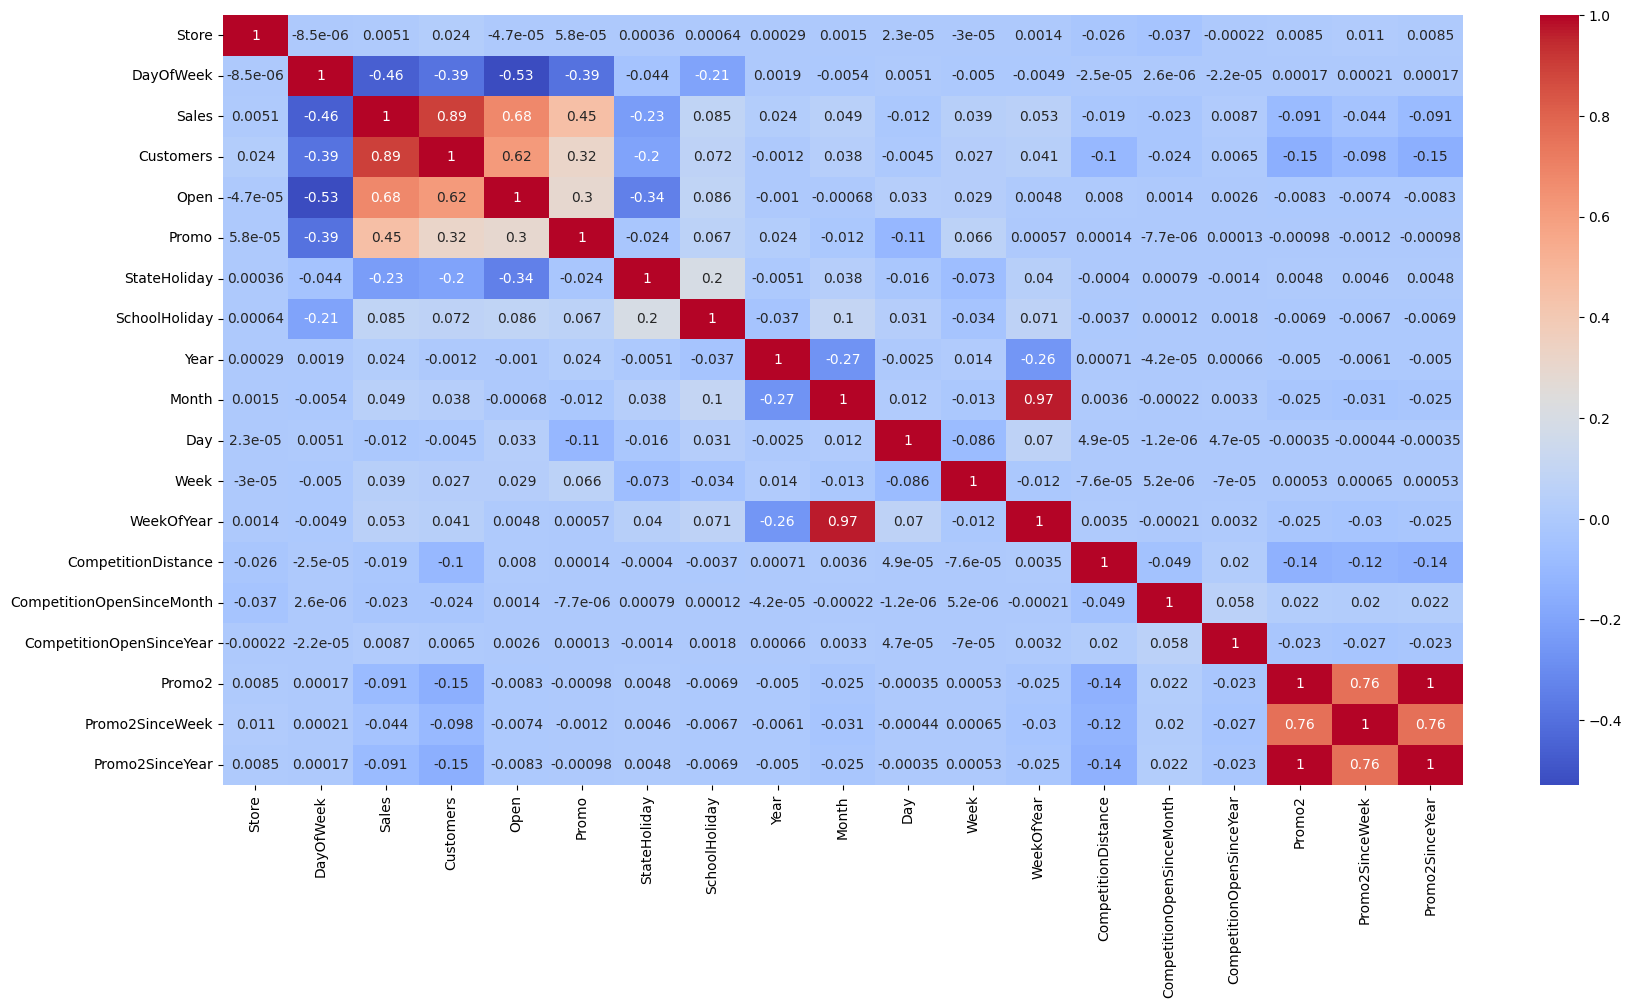

In [175]:
#Correlation
#sales column doesn't have corr value of more than 0.95 with any other column so no need to drop.
#month and week of year is highly correlated and value is more than 0.95.So we can drop any one column.
plt.figure(figsize=(20,10))
correlation=df.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [176]:
df.drop(['WeekOfYear'],axis=1,inplace=True)

<AxesSubplot:>

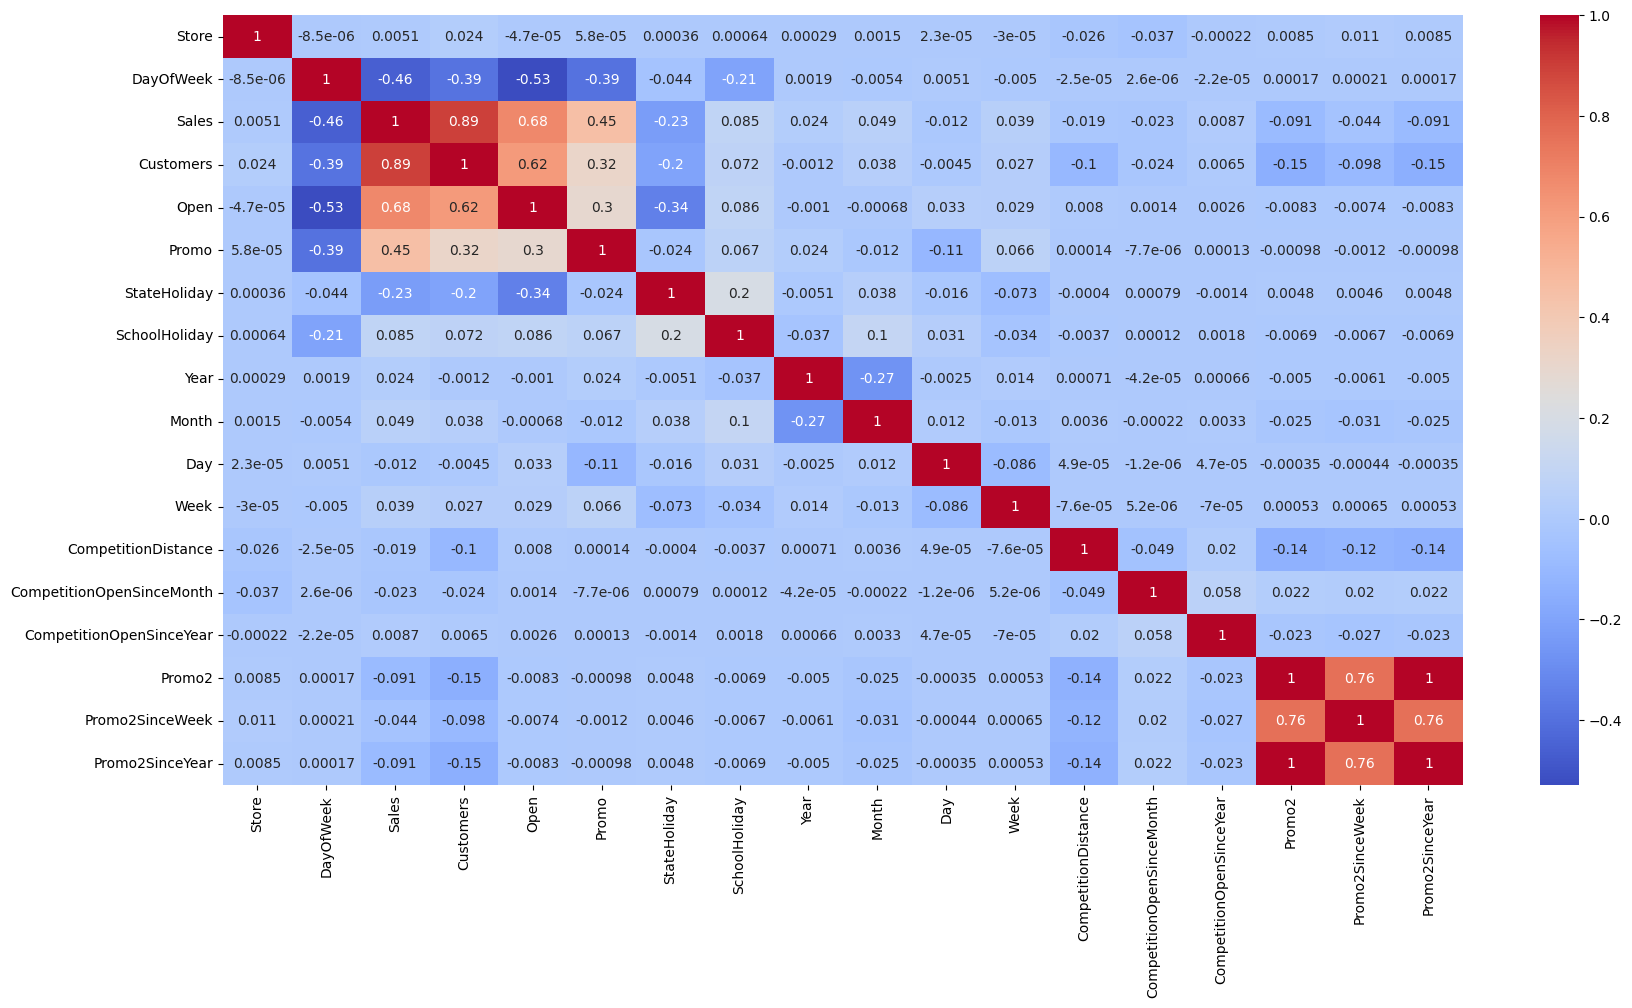

In [177]:
plt.figure(figsize=(20,10))
correlation=df.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm')

In [178]:
#check multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [179]:
# vif of promo2sinceyear,year,competitionopensinceyear is quite high so we decided to drop it.
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,4.025089e+00
1,DayOfWeek,8.352127e+00
2,Customers,5.126274e+00
3,Open,1.336000e+01
4,Promo,2.025952e+00
5,StateHoliday,1.318551e+00
6,SchoolHoliday,1.339723e+00
7,Year,1.395466e+05
8,Month,4.157774e+00
9,Day,4.295576e+00


In [180]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales','Year','Promo2SinceYear','CompetitionOpenSinceYear']]])

,variables,VIF
0,Store,3.736781
1,DayOfWeek,4.965631
2,Customers,5.096744
3,Open,10.288505
4,Promo,1.951168
5,StateHoliday,1.208321
6,SchoolHoliday,1.334746
7,Month,3.912040
8,Day,3.983934
9,Week,2.753790


# Analysis of dependent variable:Sales

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_41388\4256165467.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales'])


<AxesSubplot:xlabel='Sales', ylabel='Density'>

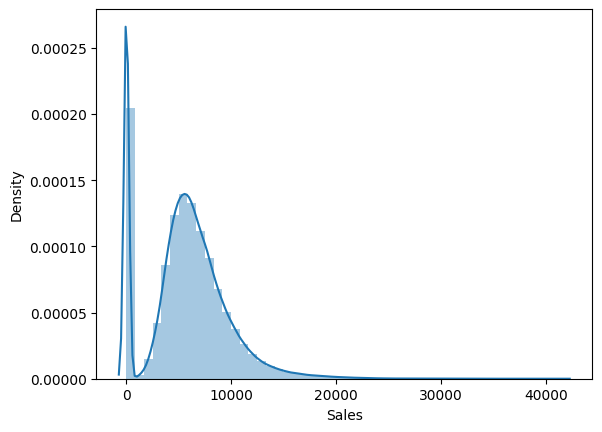

In [181]:
sns.distplot(df['Sales'])

In [182]:
df[(df.Open == 0) & (df.Sales == 0)].count()[0]

172817

In [183]:
new_df = df.drop(df[(df.Open == 0) & (df.Sales == 0)].index)

In [184]:
new_df.shape

(844392, 22)

In [185]:
new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Week,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,3,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,...,3,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,...,3,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,...,3,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,...,3,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,1,2013-01-07,6905,471,1,1,0,1,2013,...,2,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,2013,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,2013,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,2013,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [186]:
new_df = pd.get_dummies(new_df, columns=['PromoInterval'])

In [187]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017207
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Store                           844392 non-null  int64         
 1   DayOfWeek                       844392 non-null  int64         
 2   Date                            844392 non-null  datetime64[ns]
 3   Sales                           844392 non-null  int64         
 4   Customers                       844392 non-null  int64         
 5   Open                            844392 non-null  int64         
 6   Promo                           844392 non-null  int64         
 7   StateHoliday                    844392 non-null  int32         
 8   SchoolHoliday                   844392 non-null  int64         
 9   Year                            844392 non-null  int64         
 10  Month                           844392 non-null  int64 

In [188]:
# code for changing Assortment dtype from object to int.
new_df.loc[new_df['Assortment'] == 'a', 'Assortment'] = 0
new_df.loc[new_df['Assortment'] == 'b', 'Assortment'] = 1
new_df.loc[new_df['Assortment'] == 'c', 'Assortment'] = 2
new_df['Assortment'] = new_df['Assortment'].astype(int, copy=False)

In [189]:
# code for changing StoreType dtype from object to int.
new_df.loc[new_df['StoreType'] == 'a', 'StoreType'] = 0
new_df.loc[new_df['StoreType'] == 'b', 'StoreType'] = 1
new_df.loc[new_df['StoreType'] == 'c', 'StoreType'] = 2
new_df.loc[new_df['StoreType'] == 'd', 'StoreType'] = 3
new_df['StoreType'] = new_df['StoreType'].astype(int, copy=False)


In [190]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017207
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Store                           844392 non-null  int64         
 1   DayOfWeek                       844392 non-null  int64         
 2   Date                            844392 non-null  datetime64[ns]
 3   Sales                           844392 non-null  int64         
 4   Customers                       844392 non-null  int64         
 5   Open                            844392 non-null  int64         
 6   Promo                           844392 non-null  int64         
 7   StateHoliday                    844392 non-null  int32         
 8   SchoolHoliday                   844392 non-null  int64         
 9   Year                            844392 non-null  int64         
 10  Month                           844392 non-null  int64 

In [191]:
new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,1270.0,9.0,2008.0,0,0.0,0.0,1,0,0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,...,1270.0,9.0,2008.0,0,0.0,0.0,1,0,0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,...,1270.0,9.0,2008.0,0,0.0,0.0,1,0,0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,...,1270.0,9.0,2008.0,0,0.0,0.0,1,0,0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,...,1270.0,9.0,2008.0,0,0.0,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017202,1115,1,2013-01-07,6905,471,1,1,0,1,2013,...,5350.0,9.0,2013.0,1,22.0,2012.0,0,0,0,1
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,2013,...,5350.0,9.0,2013.0,1,22.0,2012.0,0,0,0,1
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,2013,...,5350.0,9.0,2013.0,1,22.0,2012.0,0,0,0,1
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,2013,...,5350.0,9.0,2013.0,1,22.0,2012.0,0,0,0,1


# Machine Learning Model

In [192]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

In [193]:
import lightgbm as lgb

By Taking Dataset(Excluding rows sales=0)

In [194]:
new_df.shape

(844392, 25)

In [195]:
dependent_variables=['Sales']
independent_variables=list(new_df.columns.drop(['Promo2SinceYear','Sales','Year','CompetitionOpenSinceYear','Date']))

In [196]:
independent_variables

['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'Month',
 'Day',
 'Week',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [197]:
X=new_df[independent_variables].values
y=new_df[dependent_variables].values

In [198]:
#Splitting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [199]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(675513, 20)
(168879, 20)
(675513, 1)
(168879, 1)


LINEAR REGRESSION

In [200]:
reg=LinearRegression().fit(X_train,y_train)

In [201]:
reg.score(X_train,y_train)

0.7631162840847069

In [202]:
reg.coef_

array([[-1.71002451e-01, -6.79650130e+01,  6.34116400e+00,
         1.66977543e-13,  1.29675352e+03, -1.30051447e+03,
         3.41132080e+01,  2.94520558e+01,  1.53380322e+00,
         1.51943946e+01,  2.74479285e+02,  2.16789436e+02,
         2.84492988e-02, -1.17815352e+01, -4.41117150e+01,
         1.18994108e+01,  4.41117150e+01,  3.29940806e+01,
         1.38584444e+02, -2.15690239e+02]])

In [203]:
reg.intercept_

array([891.86001585])

In [204]:
y_pred=reg.predict(X_test)
y_pred

array([[7217.49858471],
       [5849.63199248],
       [8050.9109844 ],
       ...,
       [6109.61677847],
       [5772.74178683],
       [5320.48218997]])

In [205]:
y_pred_train=reg.predict(X_train)
y_pred_train

array([[4502.48924658],
       [8022.31939663],
       [7534.80178392],
       ...,
       [7684.3777045 ],
       [9227.35211033],
       [6699.91265846]])

In [206]:
y_test

array([[6859],
       [4066],
       [8676],
       ...,
       [7592],
       [7519],
       [5838]], dtype=int64)

In [207]:
y_train

array([[3532],
       [6927],
       [6365],
       ...,
       [9628],
       [8470],
       [5905]], dtype=int64)

In [208]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,y_pred)
print('MSE=',MSE)

RMSE=np.sqrt(MSE)
print('RMSE=',RMSE)

MSE= 2296830.068422694
RMSE= 1515.5296329741277


In [209]:
#r2 score of linear regression is 76.27%
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print('R2=',r2)

R2= 0.762722689556364


LASSO

In [210]:
L1=Lasso(alpha=0.2,max_iter=10000)

In [211]:
L1.fit(X_train,y_train)

Lasso(alpha=0.2, max_iter=10000)

In [212]:
y_pred_lasso=L1.predict(X_test)

In [213]:
L1.score(X_test,y_test)

0.7627221313334089

In [214]:
pd.DataFrame(zip(y_test, y_pred_lasso), columns = ['actual', 'pred'])

,actual,pred
0,[6859],7217.010136
1,[4066],5847.437391
2,[8676],8049.679247
3,[10004],10159.252680
4,[17697],15639.208987
...,...,...
168874,[7867],7632.643423
168875,[2493],3765.686540
168876,[7592],6109.870896
168877,[7519],5775.573339


RIDGE

In [215]:
L2=Ridge(alpha=0.5)

In [216]:
L2.fit(X_train,y_train)

Ridge(alpha=0.5)

In [217]:
L2.predict(X_test)

array([[7217.50055941],
       [5849.62792118],
       [8050.90828227],
       ...,
       [6109.61751523],
       [5772.7438387 ],
       [5320.48352631]])

In [218]:
L2.score(X_test,y_test)

0.7627227018671762

DECISION TREE

In [219]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [220]:
y_pred_dt=decision_tree.predict(X_test)
y_pred_dt

array([7594.06795178, 4995.05668179, 9190.22639063, ..., 7894.57137999,
       6516.05438406, 6313.47701044])

In [221]:
y_train_dt=decision_tree.predict(X_train)
y_train_dt

array([2763.64562484, 8992.27508468, 8992.27508468, ..., 6172.14226351,
       8992.27508468, 6165.61711734])

In [222]:
MSE=mean_squared_error(y_test,y_pred_dt)
print('MSE=',MSE)

RMSE=np.sqrt(MSE)
print('RMSE=',RMSE)

MSE= 2047437.9306411182
RMSE= 1430.8871131717967


In [223]:
#r2 score of decision tree is 78.84%
r2=r2_score(y_test,y_pred_dt)
print('R2=',r2)

R2= 0.7884865005200713


In [224]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)

In [225]:
xgb_r.fit(X_train,y_train)

[08:09:11] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [226]:
pred = xgb_r.predict(X_test)
pred

array([7715.1   , 4886.136 , 7815.066 , ..., 7240.984 , 6781.9136,
       5602.2583], dtype=float32)

In [227]:
xgb_r_score_train=xgb_r.score(X_train , y_train)
xgb_r_score_train

0.8902701597433487

In [228]:
xgb_r_score_test=xgb_r.score(X_test,y_test)
xgb_r_score_test

0.8893181390731164

In [229]:
#XGboost has r2 score of 89%
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train,xgb_r.predict(X_train)))

R2 Value: 0.8902701597433487


XgBoost has the highest accuracy among all other models. So XGBoost is the best model for this dataset.Now lets chech the accuracy with whole dataset where sales=0 is also included.

BY TAKING WHOLE DATASET

In [230]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Week,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,3,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,...,3,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,...,3,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,...,3,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,...,3,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,2013,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,2013,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,2013,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,2013,...,1,d,c,5350.0,9.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [231]:
df=pd.get_dummies(df,columns=['PromoInterval'])

In [232]:
# code for changing Assortment dtype from object to int.
df.loc[df['Assortment'] == 'a', 'Assortment'] = 0
df.loc[df['Assortment'] == 'b', 'Assortment'] = 1
df.loc[df['Assortment'] == 'c', 'Assortment'] = 2
df['Assortment'] = df['Assortment'].astype(int, copy=False)

In [233]:
# code for changing StoreType dtype from object to int.
df.loc[df['StoreType'] == 'a', 'StoreType'] = 0
df.loc[df['StoreType'] == 'b', 'StoreType'] = 1
df.loc[df['StoreType'] == 'c', 'StoreType'] = 2
df.loc[df['StoreType'] == 'd', 'StoreType'] = 3
df['StoreType'] = df['StoreType'].astype(int, copy=False)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 25 columns):
 #   Column                          Non-Null Count    Dtype         
---  ------                          --------------    -----         
 0   Store                           1017209 non-null  int64         
 1   DayOfWeek                       1017209 non-null  int64         
 2   Date                            1017209 non-null  datetime64[ns]
 3   Sales                           1017209 non-null  int64         
 4   Customers                       1017209 non-null  int64         
 5   Open                            1017209 non-null  int64         
 6   Promo                           1017209 non-null  int64         
 7   StateHoliday                    1017209 non-null  int32         
 8   SchoolHoliday                   1017209 non-null  int64         
 9   Year                            1017209 non-null  int64         
 10  Month                           1017209 no

In [235]:
dep_variables=['Sales']
indepen_variables=df.columns.drop(['Promo2SinceYear','Sales','Year','CompetitionOpenSinceYear','Date'])

In [236]:
indepen_variables

Index(['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Month', 'Day', 'Week', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth', 'Promo2',
       'Promo2SinceWeek', 'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [237]:
#data of independent variables
U=df[indepen_variables].values

In [238]:
#data of dependent variables
v=df[dep_variables].values

In [239]:
#splitting the  data
U_train,U_test,v_train,v_test=train_test_split(U,v,test_size=0.25,random_state=0)

In [240]:
print(U_train.shape)
print(U_test.shape)
print(v_train.shape)
print(v_test.shape)

(762906, 20)
(254303, 20)
(762906, 1)
(254303, 1)


LINEAR REGRESSION

In [241]:
# scaling the x values
scaler=StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)

In [242]:
linear_regression=LinearRegression().fit(U_train,v_train)

In [243]:
#in full dataset we got a value of 86.79% in linear regression
linear_regression.score(U_train,v_train)

0.8679368163111

In [244]:
linear_regression.coef_

array([[-4.46664425e+01, -1.37617658e+02,  2.92815368e+03,
         5.17098992e+02,  6.09143761e+02, -1.05492345e+02,
         1.70108748e+01,  9.08968355e+01,  1.53899200e+01,
         1.09552257e+01,  3.06694442e+02,  1.79409692e+02,
         1.83247026e+02, -2.68881080e+01,  1.00845360e+14,
         1.52098685e+02,  3.90372102e+13, -3.97409786e+13,
        -5.59843299e+13, -3.63925737e+13]])

In [245]:
linear_regression.intercept_

array([5775.09230079])

In [246]:
v_pred=linear_regression.predict(U_test)
v_pred

array([[ 3886.13917579],
       [ 6373.11183204],
       [ 6078.07276954],
       ...,
       [15843.01026954],
       [ 6358.15480079],
       [ 5303.56105079]])

In [247]:
regression_Dataframe = pd.DataFrame(zip(v_test, v_pred), columns = ['actual', 'pred'])
regression_Dataframe

,actual,pred
0,[3598],[3886.1391757930496]
1,[7212],[6373.11183204305]
2,[5894],[6078.07276954305]
3,[7493],[8246.27980079305]
4,[0],[-308.8920742069504]
...,...,...
254298,[9006],[10008.93605079305]
254299,[7366],[6649.23292579305]
254300,[16727],[15843.01026954305]
254301,[6090],[6358.15480079305]


In [248]:
from sklearn.metrics import mean_squared_error

sales_mean=df[dep_variables].mean()
MSE  = mean_squared_error(v_test, v_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred)
print("R2 :" ,r2)

MSE : 1952541.221810714
RMSE : 1397.3336114939461
RMPSE : Sales    0.242012
dtype: float64
R2 : 0.8675456746672279


LASSO

In [249]:
lasso=Lasso(alpha=2.0)

In [250]:
lasso.fit(U_train,v_train)

Lasso(alpha=2.0)

In [251]:
v_pred_lasso=lasso.predict(U_test)

In [252]:
v_pred_lasso

array([ 3890.12876113,  6367.8972934 ,  6070.86128607, ...,
       15829.62325037,  6359.75025334,  5303.42112872])

In [253]:
#we got 86.79% in losso
lasso.score(U_train,v_train)

0.8679322588576158

In [254]:
pd.DataFrame(zip(v_test, v_pred_lasso), columns = ['actual', 'pred'])

,actual,pred
0,[3598],3890.128761
1,[7212],6367.897293
2,[5894],6070.861286
3,[7493],8234.728877
4,[0],-307.997130
...,...,...
254298,[9006],10004.951804
254299,[7366],6651.049529
254300,[16727],15829.623250
254301,[6090],6359.750253


RIDGE

In [255]:
ridge=Ridge(alpha=0.5)

In [256]:
ridge.fit(U_train,v_train)

Ridge(alpha=0.5)

In [257]:
v_pred_ridge=ridge.predict(U_test)

In [258]:
v_pred_ridge

array([[ 3886.66876526],
       [ 6372.610373  ],
       [ 6077.61659628],
       ...,
       [15842.7178552 ],
       [ 6357.59983595],
       [ 5303.03402951]])

In [259]:
#in ridge we got a score of 86.75%
ridge.score(U_test,v_test)

0.8675459597796881

In [260]:
MSE  = mean_squared_error(v_test, v_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_ridge)
print("R2 :" ,r2)

MSE : 1952537.01889903
RMSE : 1397.332107588969
RMPSE : Sales    0.242012
dtype: float64
R2 : 0.8675459597796881


DECISION TREE

In [261]:
decision_tree=DecisionTreeRegressor(max_depth=5)

In [262]:
decision_tree.fit(U_train, v_train)

DecisionTreeRegressor(max_depth=5)

In [263]:
v_pred_dt=decision_tree.predict(U_test)

In [264]:
v_pred_dt

array([ 4526.73988077,  6895.11832594,  6457.34213958, ...,
       12716.76460598,  6895.11832594,  5607.38929742])

In [265]:
v_train_dt=decision_tree.predict(U_train)

In [266]:
v_train_dt

array([ 6895.11832594,  7709.90666324, 10851.40766707, ...,
        6895.11832594, 16153.81326316, 10851.40766707])

In [267]:
#in decision tree we have got the r2 score of 86.92%
MSE  = mean_squared_error(v_test, v_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_dt)
print("R2 :" ,r2)

MSE : 1927376.7221718663
RMSE : 1388.2999395562424
RMPSE : Sales    0.240447
dtype: float64
R2 : 0.869252756077222


In [268]:
decisiontree_Dataframe = pd.DataFrame(zip(v_test, v_pred_dt), columns = ['actual', 'pred'])
decisiontree_Dataframe

,actual,pred
0,[3598],4526.739881
1,[7212],6895.118326
2,[5894],6457.342140
3,[7493],7709.906663
4,[0],0.000354
...,...,...
254298,[9006],9234.933447
254299,[7366],5607.389297
254300,[16727],12716.764606
254301,[6090],6895.118326


XGBOOST

In [269]:
from xgboost import XGBRegressor

RegModel=XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree')

In [270]:
XGB=RegModel.fit(U_train,v_train)

[08:09:31] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-08de971ced8a8cdc6-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [271]:
#in xgboost the r2 scorre is 96.13%
from sklearn import metrics
print('R2 Value:',metrics.r2_score(v_train, XGB.predict(U_train)))

R2 Value: 0.9607125482630217


In [272]:
XGB_score_train=XGB.score(U_train ,v_train)
XGB_score_train

0.9607125482630217

In [273]:
XGB_score_test=XGB.score(U_test , v_test)
XGB_score_test

0.9600733986301366

-XgBoost has the highest accuracy among all other models. So XGBoost is the best model for this dataset.
-By seeing both dataset we come to know that dataset including sales=0 have more accuracy compare to excluding sale=0 because lot of information went missing which affected the accuracy of model. 
-So, we decided to keep all the datails of sales.